In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
from tools_ryu import mytool
from tools_ryu.cross_sectional import CrossSectional

In [2]:
cmktcap = pd.read_pickle("Data/cmktcap_data_final.pickle")
cmktcap_reduced = pd.read_pickle("Data/cmktcap_data_reduced.pickle")
binance = pd.read_pickle("Data/binance_data_pp.pickle")

In [3]:
# Initialize the Data
c_mkt = CrossSectional(cmktcap,"coinmarketcap")
c_mkt_reduced = CrossSectional(cmktcap_reduced, "coinmarketcap")
b_mkt = CrossSectional(binance, "binance")

In [4]:
#                  mktcap, volume
group_value = {"M1":[None,None],
               "M2":[1_000_000, None],
               "M3":[1_000_000,1_000_000]}

In [5]:
# 코인 마켓켑 인덱스 생성
market_index_cmktcap = {}
coin_num_cmktcap = {}

for key, value_lst in tqdm(group_value.items()):
    rtn, num = c_mkt.make_market_index(value_lst[0],value_lst[1])
    market_index_cmktcap[key] = rtn
    coin_num_cmktcap[key] = num

100%|██████████| 3/3 [00:18<00:00,  6.28s/it]


In [6]:
# 코인 마켓켑 인덱스 (바이낸스와 컬럼 일치) 생성
market_index_cmktcap_reduced = {}
coin_num_cmktcap_reduced = {}

for key, value_lst in tqdm(group_value.items()):
    rtn, num = c_mkt_reduced.make_market_index(value_lst[0],value_lst[1])
    market_index_cmktcap_reduced[key] = rtn
    coin_num_cmktcap_reduced[key] = num

100%|██████████| 3/3 [00:01<00:00,  1.91it/s]


In [7]:
# 바이낸스 인덱스 생성
market_index_binance = {}
coin_num_binance = {}

for key, value_lst in tqdm(group_value.items()):
    rtn,num = b_mkt.make_market_index(value_lst[0],value_lst[1])
    market_index_binance[key] = rtn
    coin_num_binance[key] = num

100%|██████████| 3/3 [00:01<00:00,  1.89it/s]


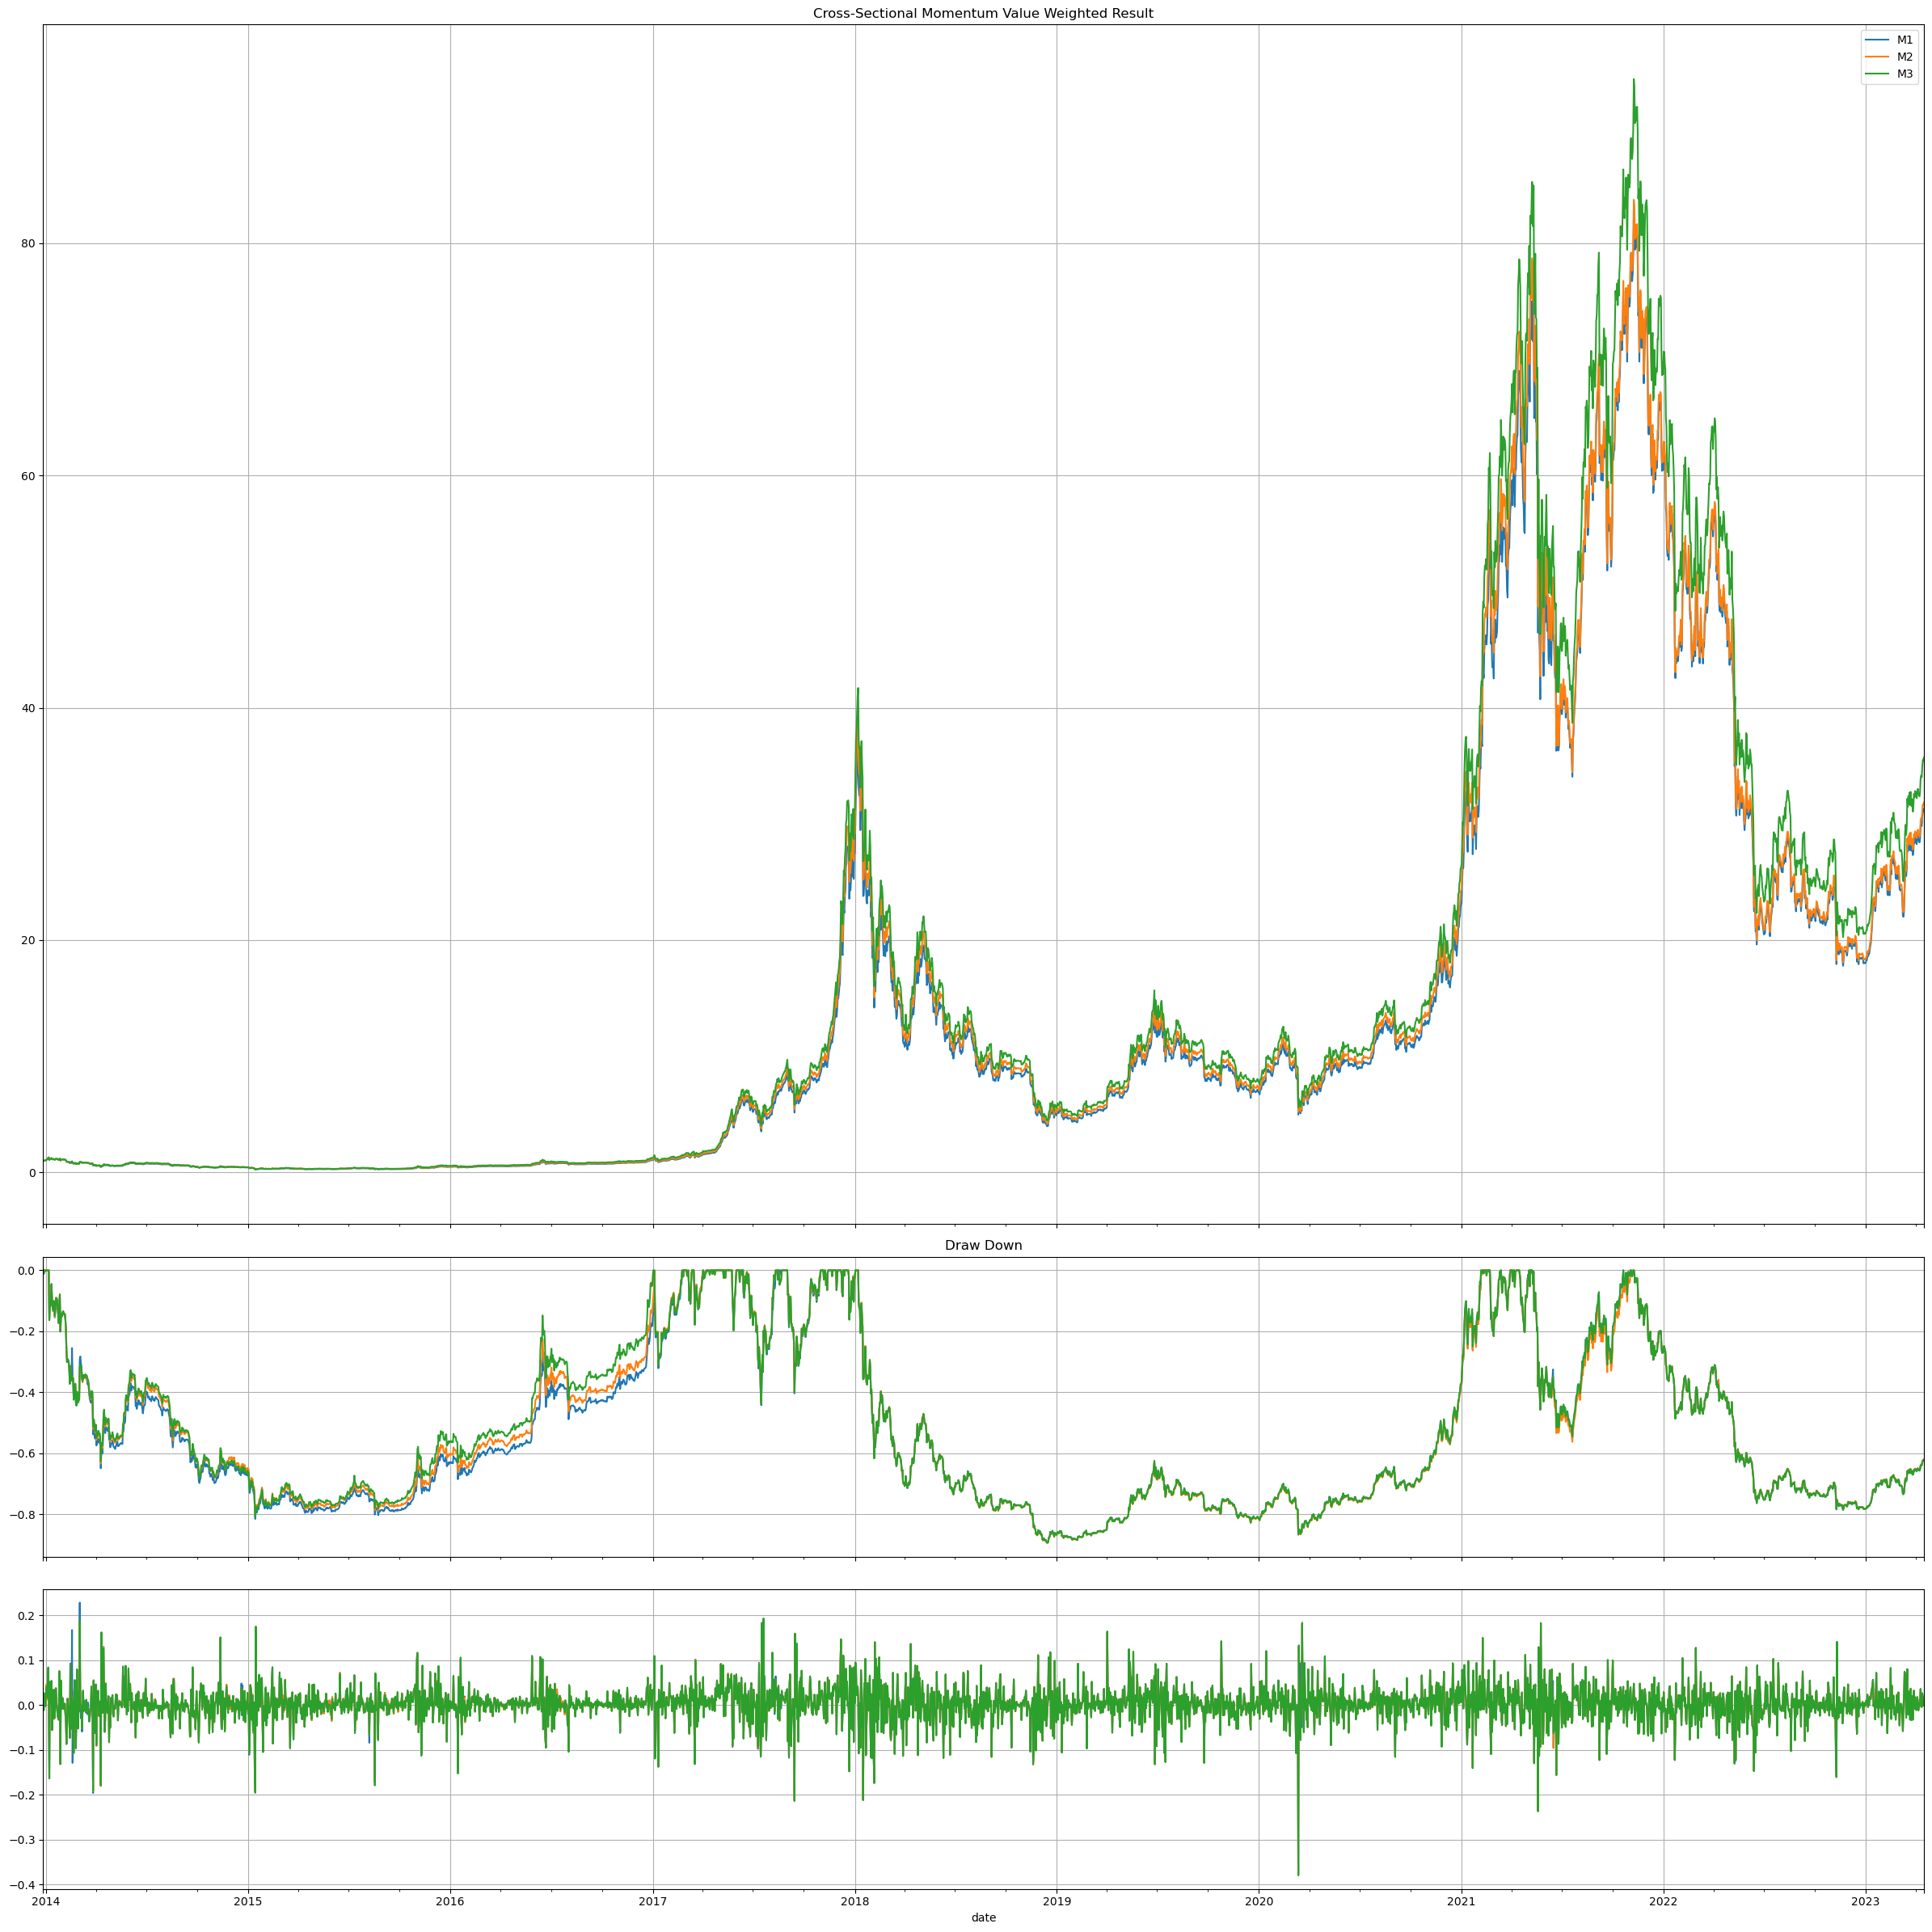

In [8]:
mytool.draw_return_result(market_index_cmktcap, one_plot=True, start_date="2013-12-27")

In [9]:
mytool.print_statistics(market_index_cmktcap, None, start_date="2013-12-27")

0         1         2
CAGR    0.449600  0.452000  0.470100
Mean    0.656450  0.654290  0.668960
STD     0.749442  0.743737  0.747010
MDD     0.893000  0.893000  0.893000
Sharpe  0.875918  0.879732  0.895516

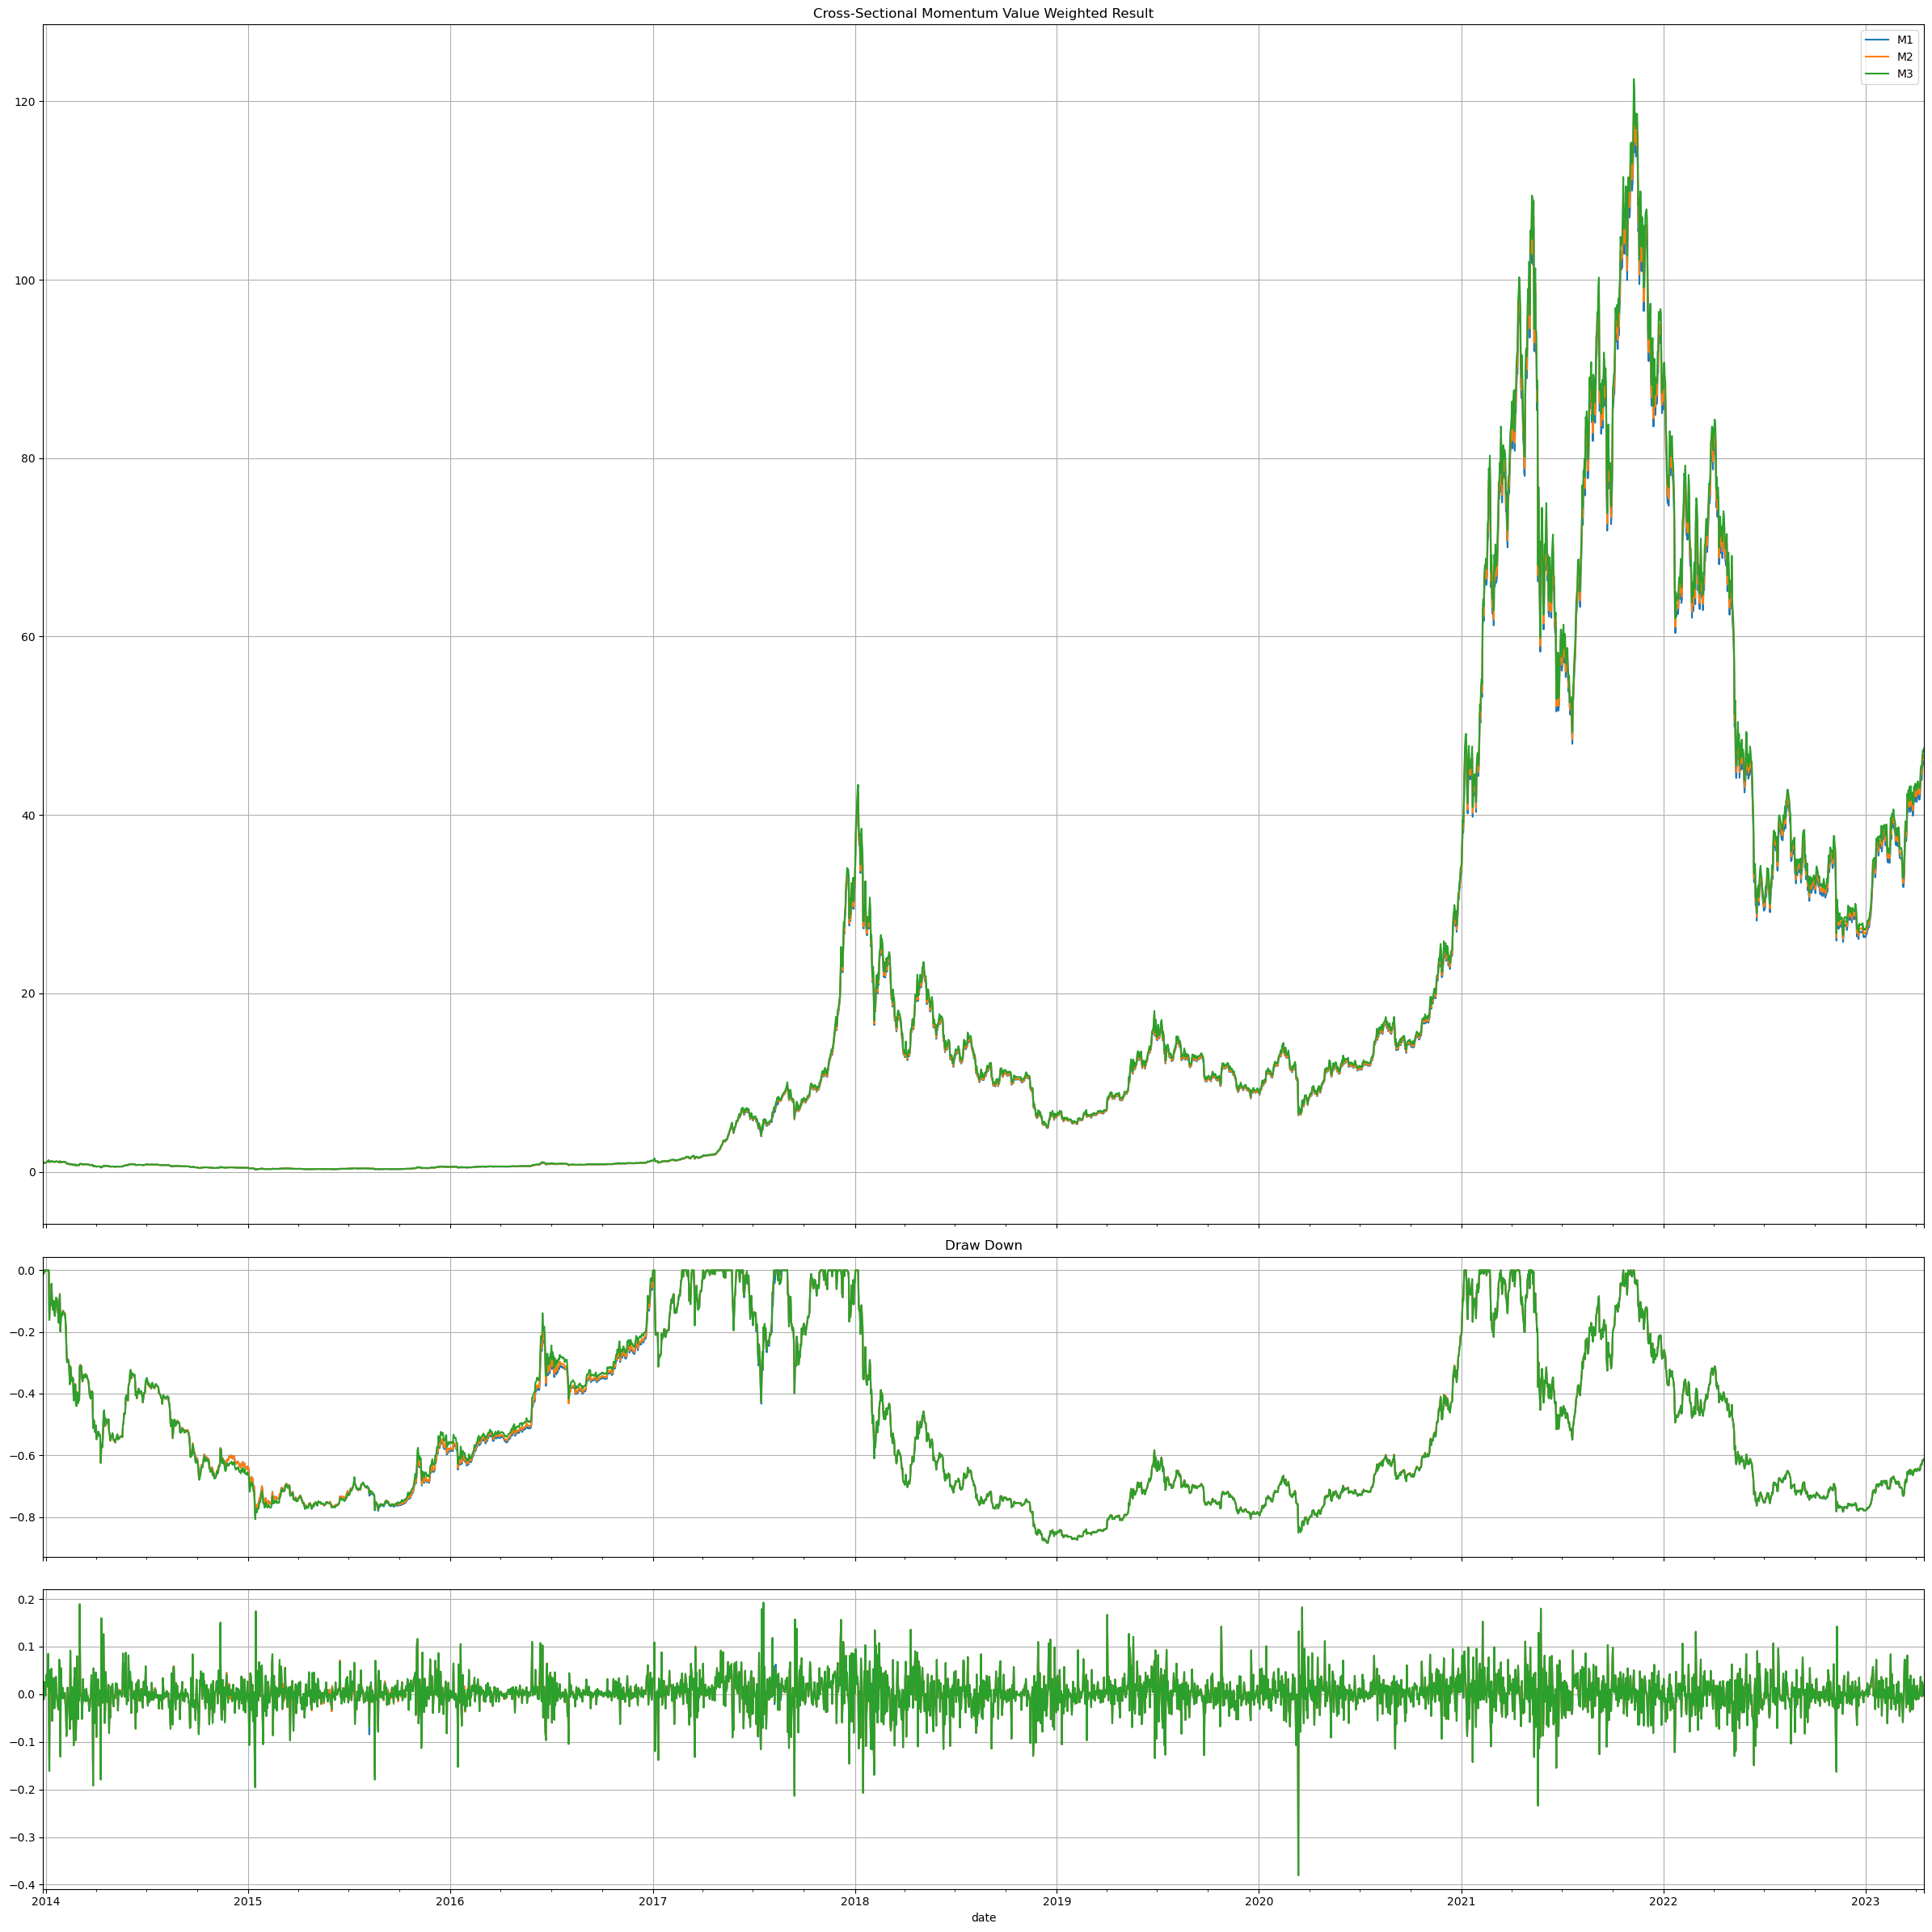

In [10]:
mytool.draw_return_result(market_index_cmktcap_reduced, one_plot=True, start_date="2013-12-27")

In [11]:
mytool.print_statistics(market_index_cmktcap_reduced, None, start_date="2013-12-27")

0         1         2
CAGR    0.510800  0.513100  0.515800
Mean    0.694570  0.695990  0.699610
STD     0.744936  0.744745  0.747261
MDD     0.884000  0.884000  0.884000
Sharpe  0.932389  0.934535  0.936232

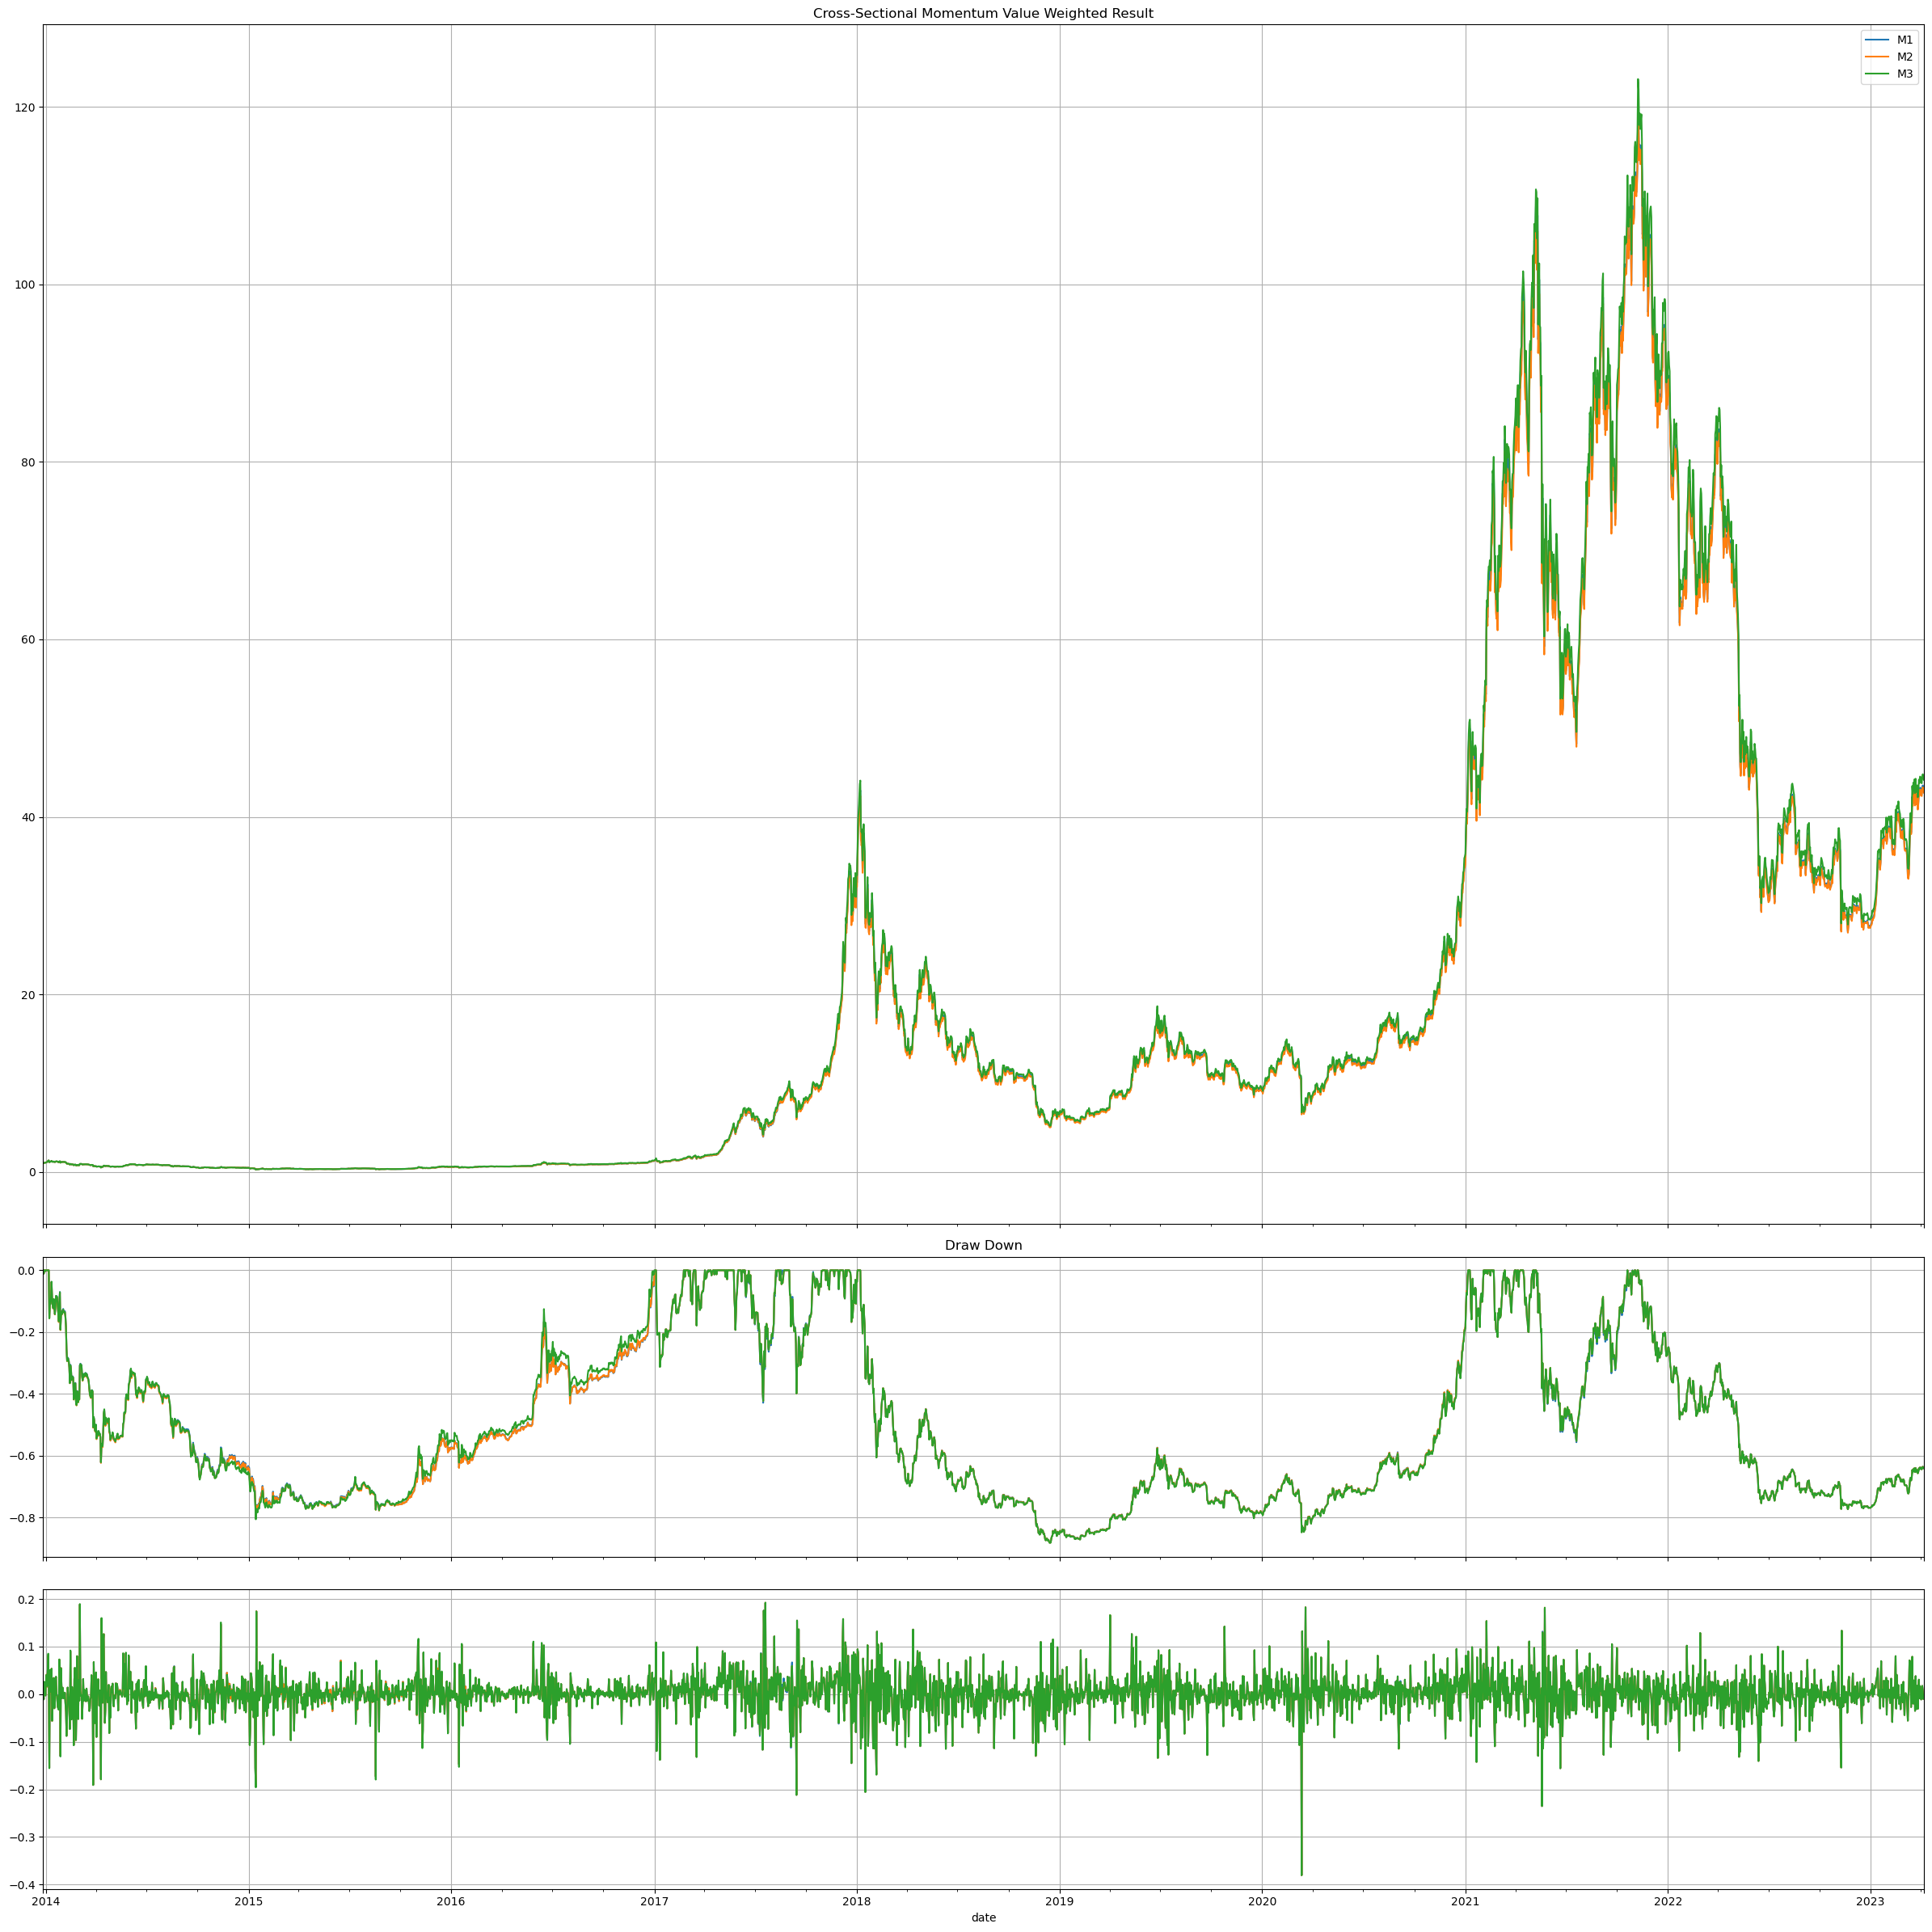

In [12]:
mytool.draw_return_result(market_index_binance, one_plot=True, start_date="2013-12-27")

In [13]:
mytool.print_statistics(market_index_binance, None, start_date="2013-12-27")

0         1         2
CAGR    0.501100  0.500300  0.505800
Mean    0.685930  0.685350  0.690870
STD     0.742055  0.741985  0.744541
MDD     0.882000  0.882000  0.882000
Sharpe  0.924365  0.923671  0.927915

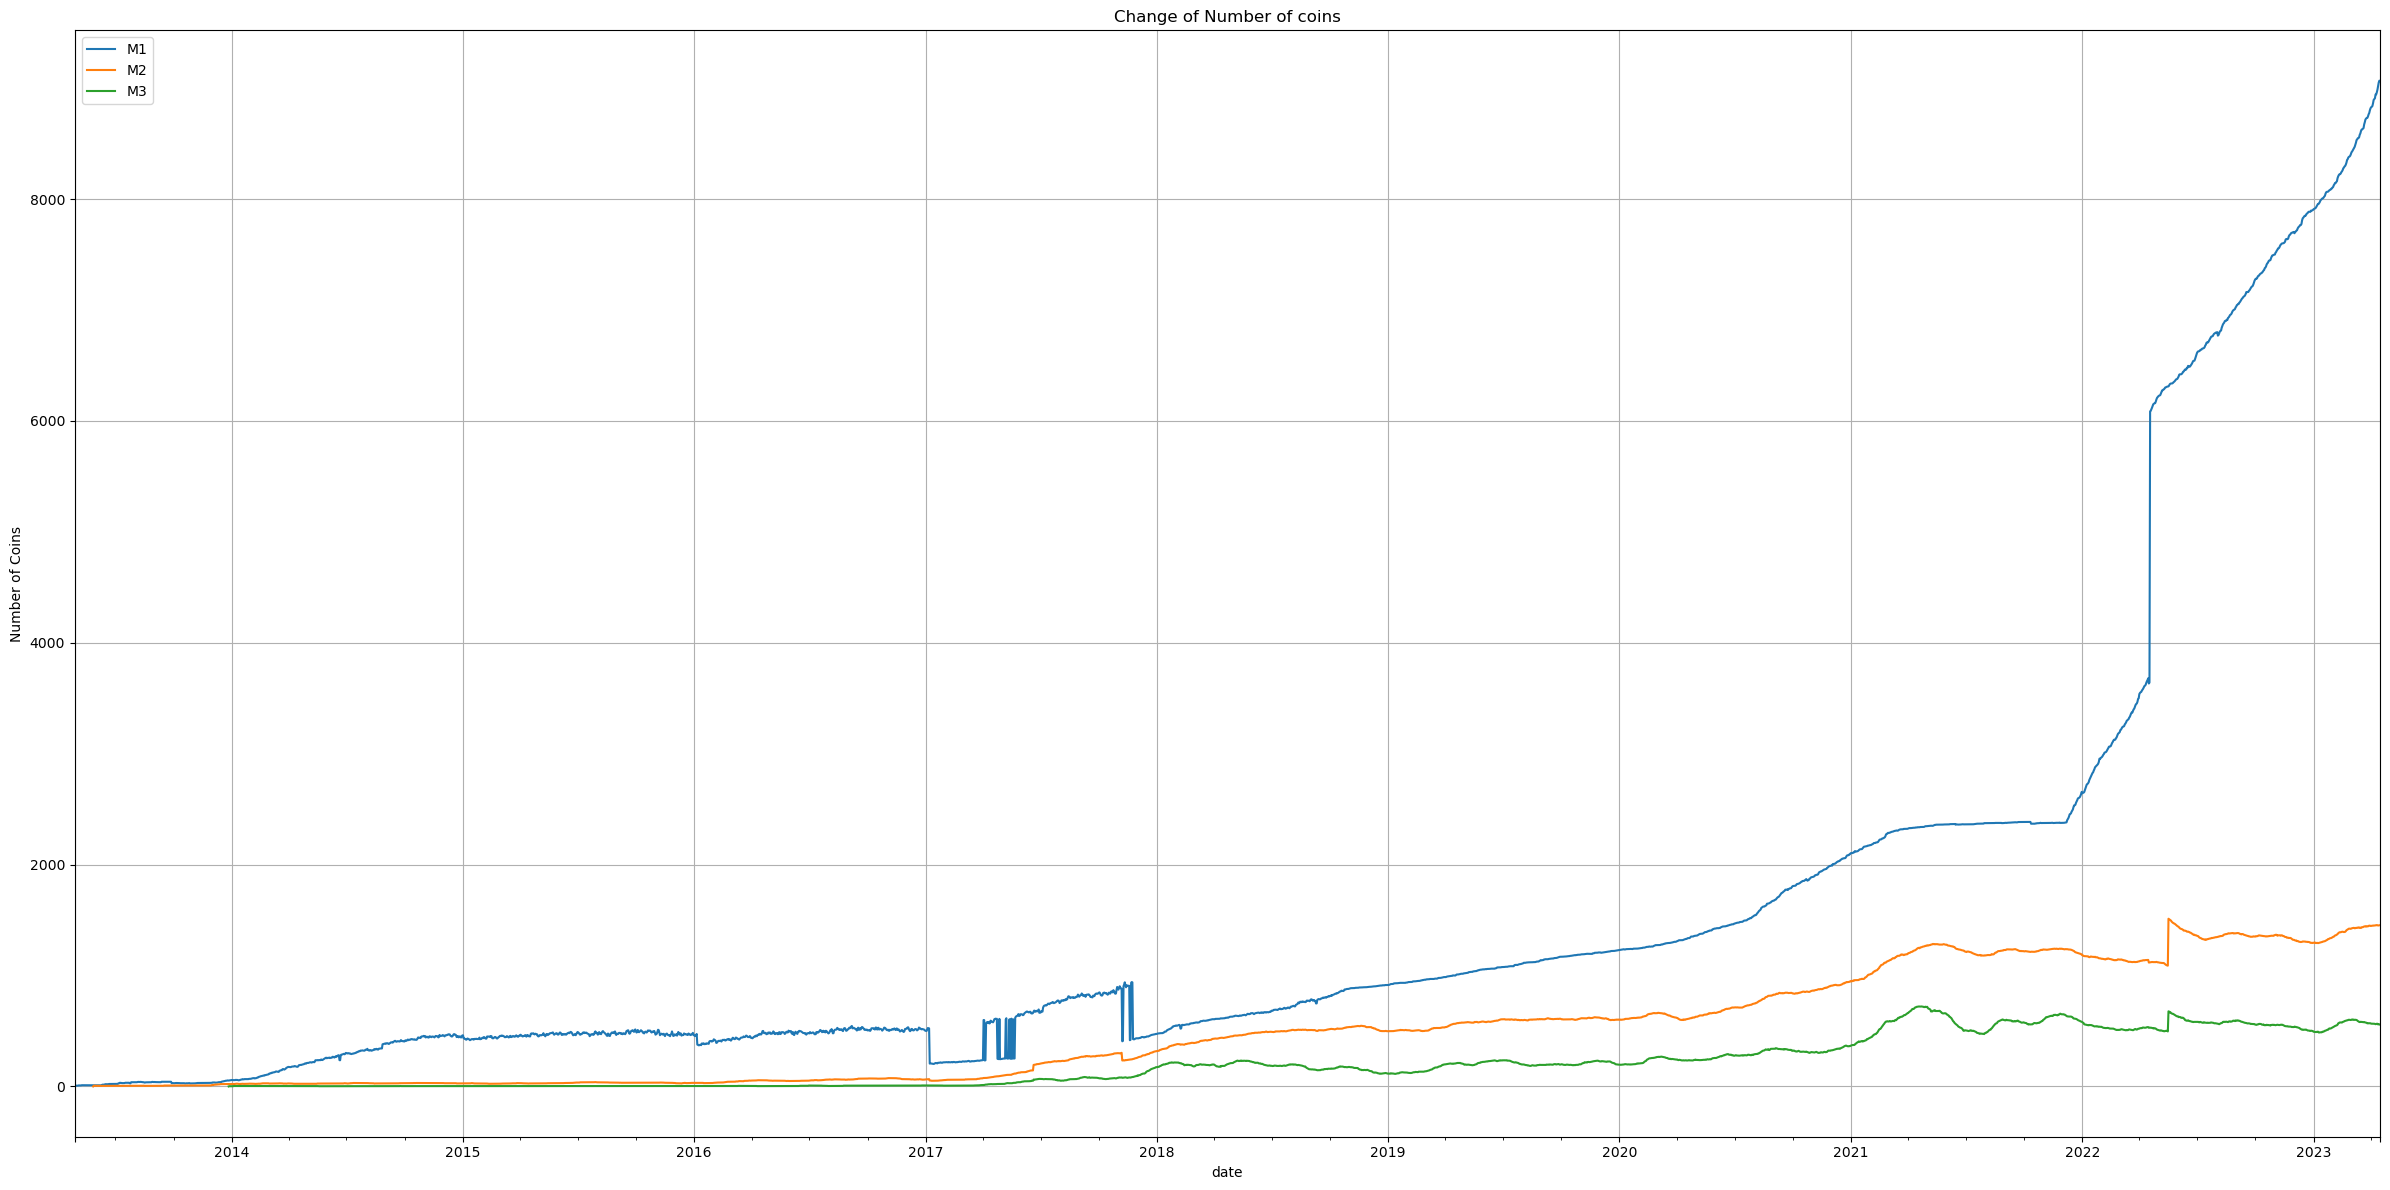

In [14]:
#coin_num_cmktcap, coin_num_cmktcap_reduced, coin_num_binance
mytool.draw_coin_count(coin_num_cmktcap)

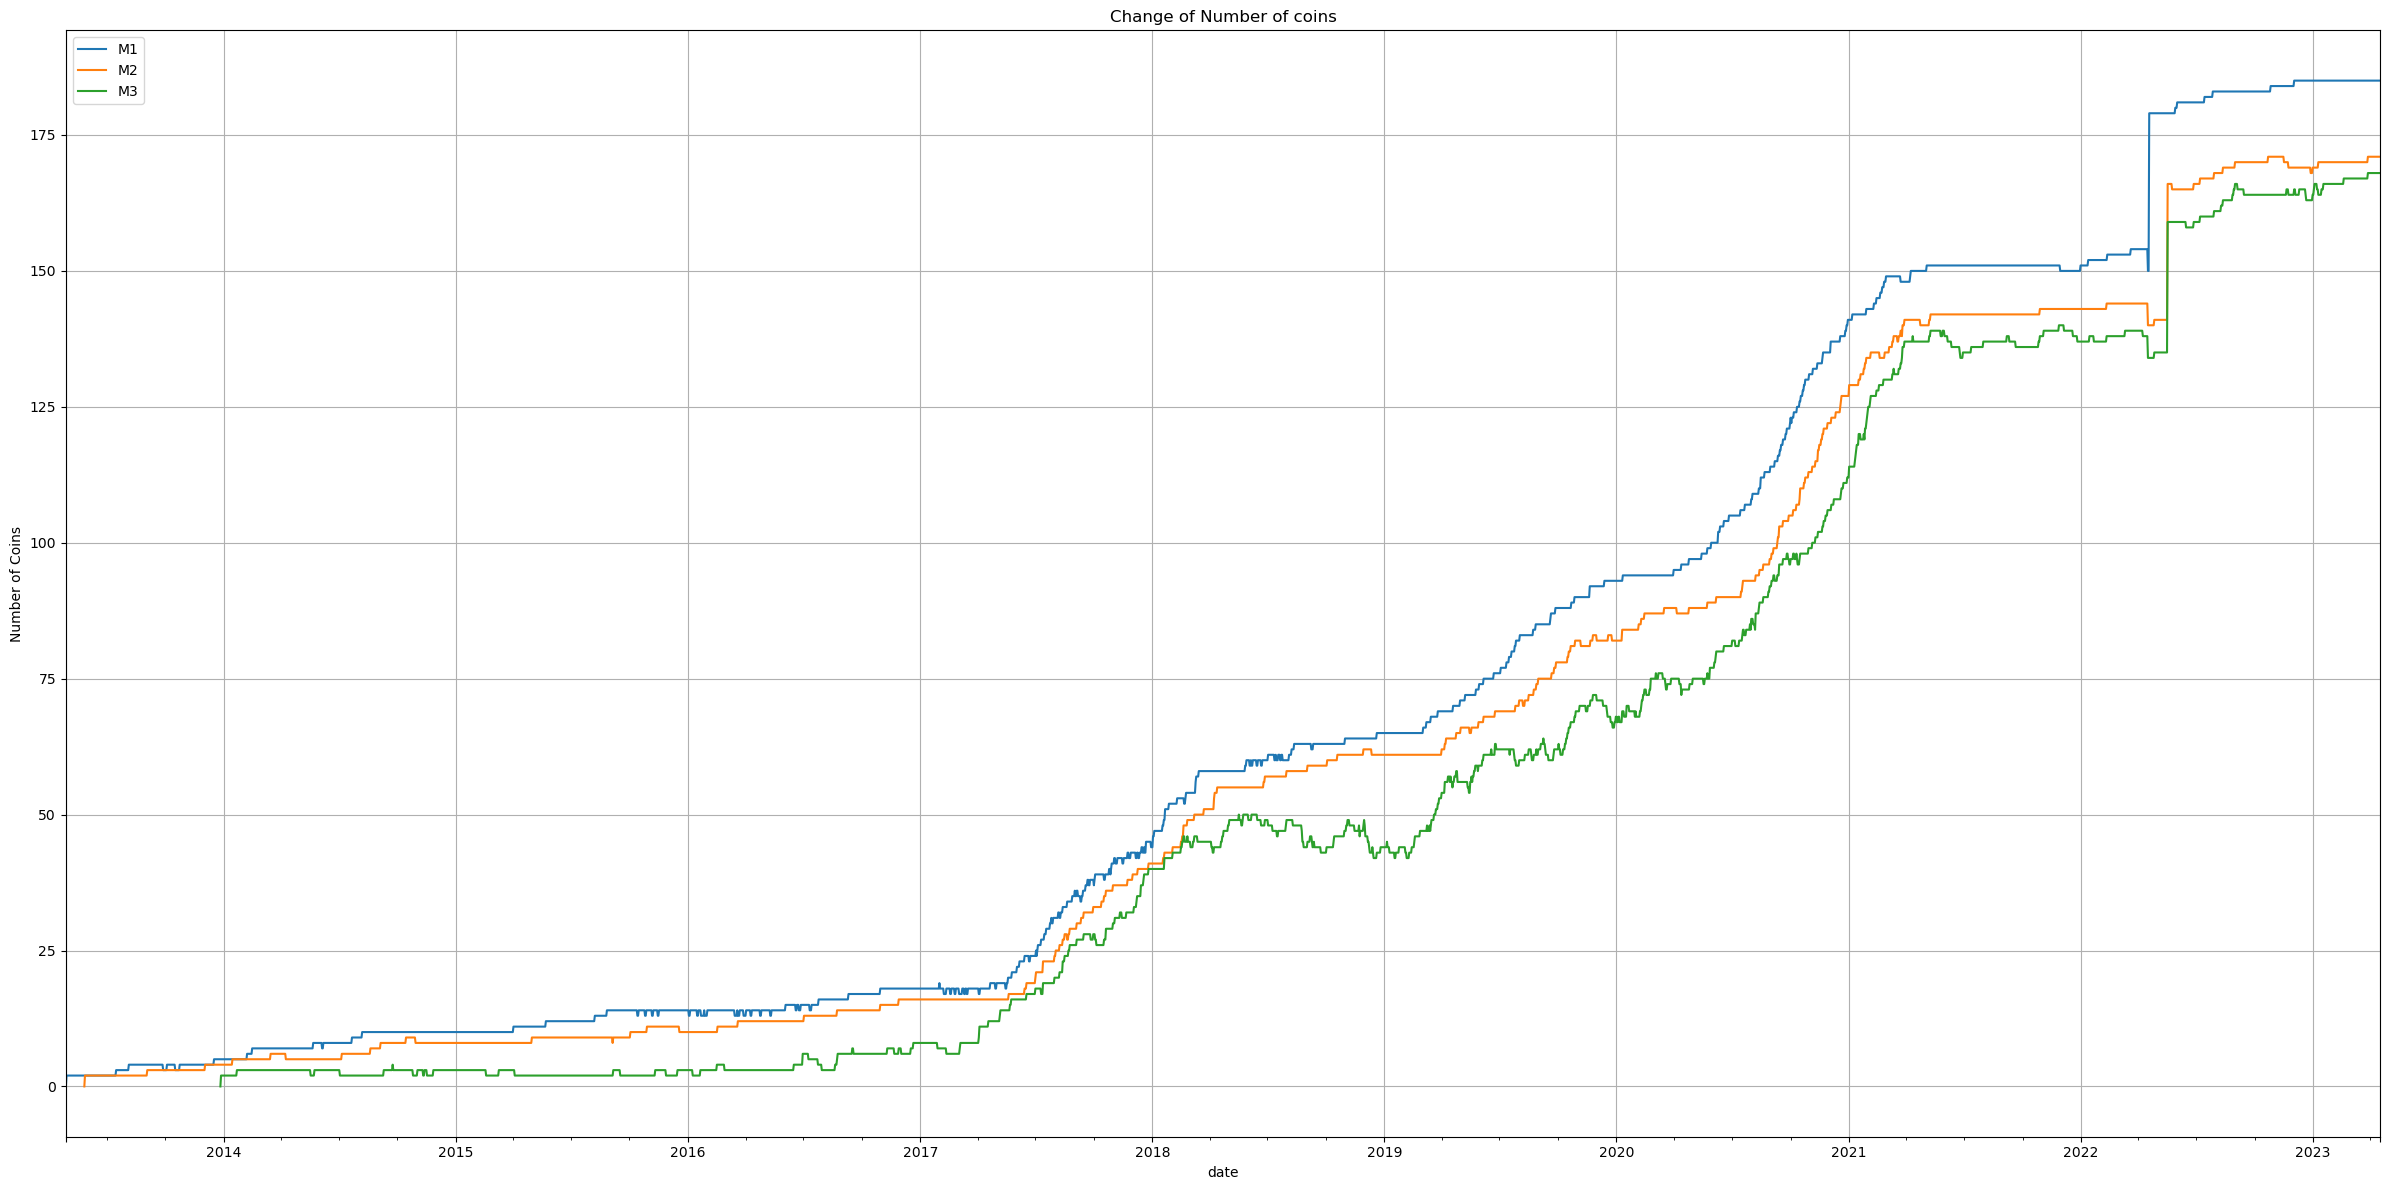

In [15]:
mytool.draw_coin_count(coin_num_cmktcap_reduced)

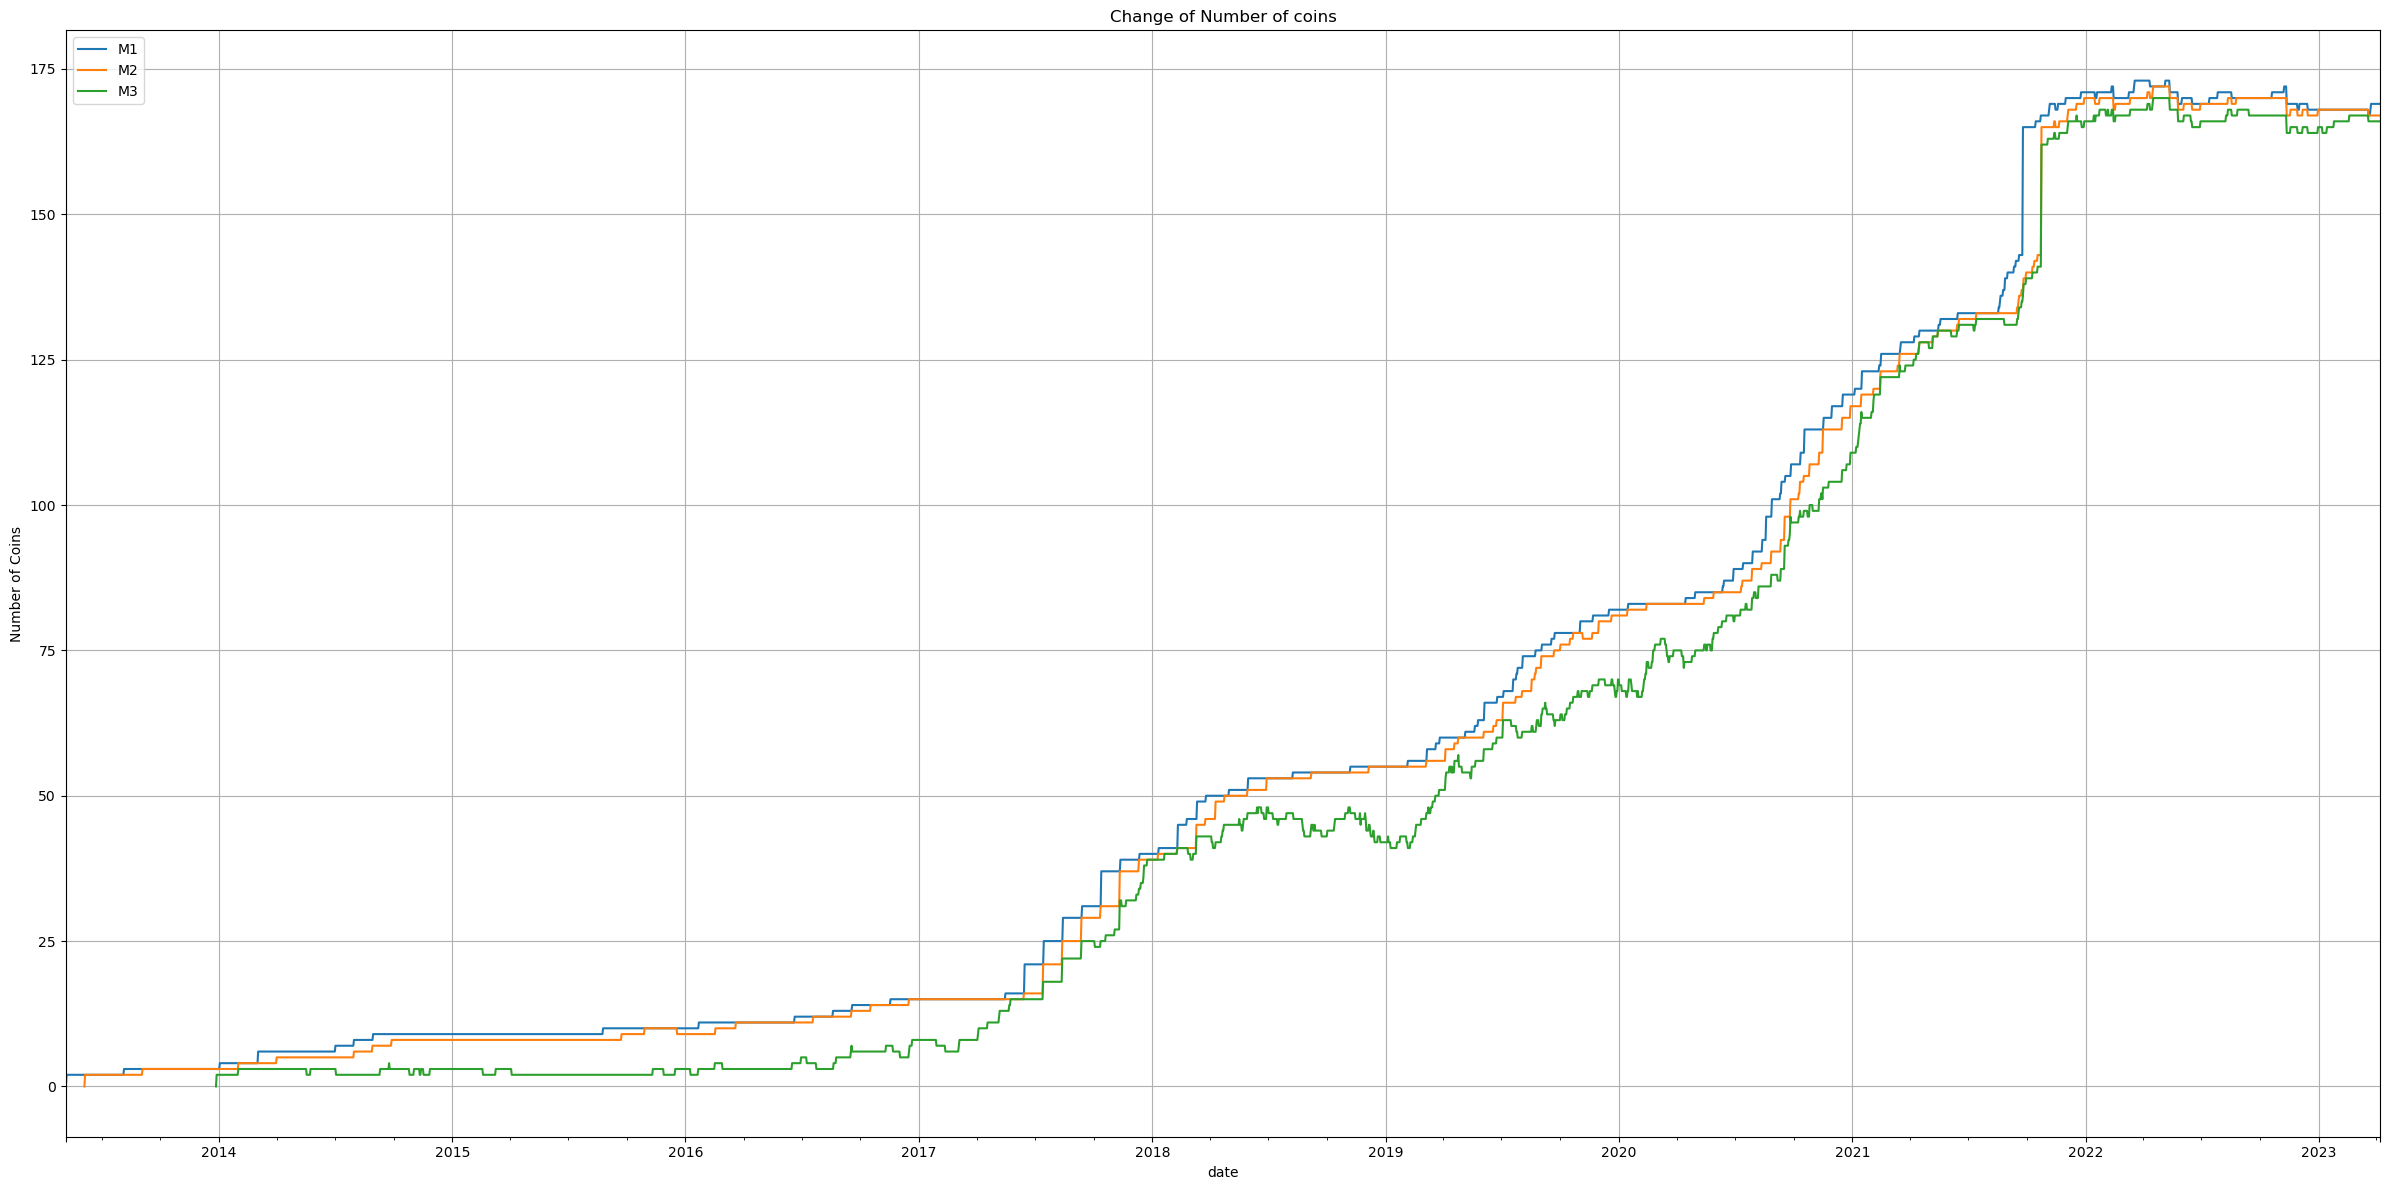

In [16]:
mytool.draw_coin_count(coin_num_binance)

횡단면 전략구현

In [17]:
momentum_cmktcap = {}
momentum_num_cmktcap = {}

for key, value_lst in group_value.items():
    rtn, num = c_mkt.weekly_momentum_w(5,"SUN", 20, value_lst[0],value_lst[1])
    momentum_cmktcap[key] = rtn
    momentum_num_cmktcap[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

100%|██████████| 5/5 [00:20<00:00,  4.03s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


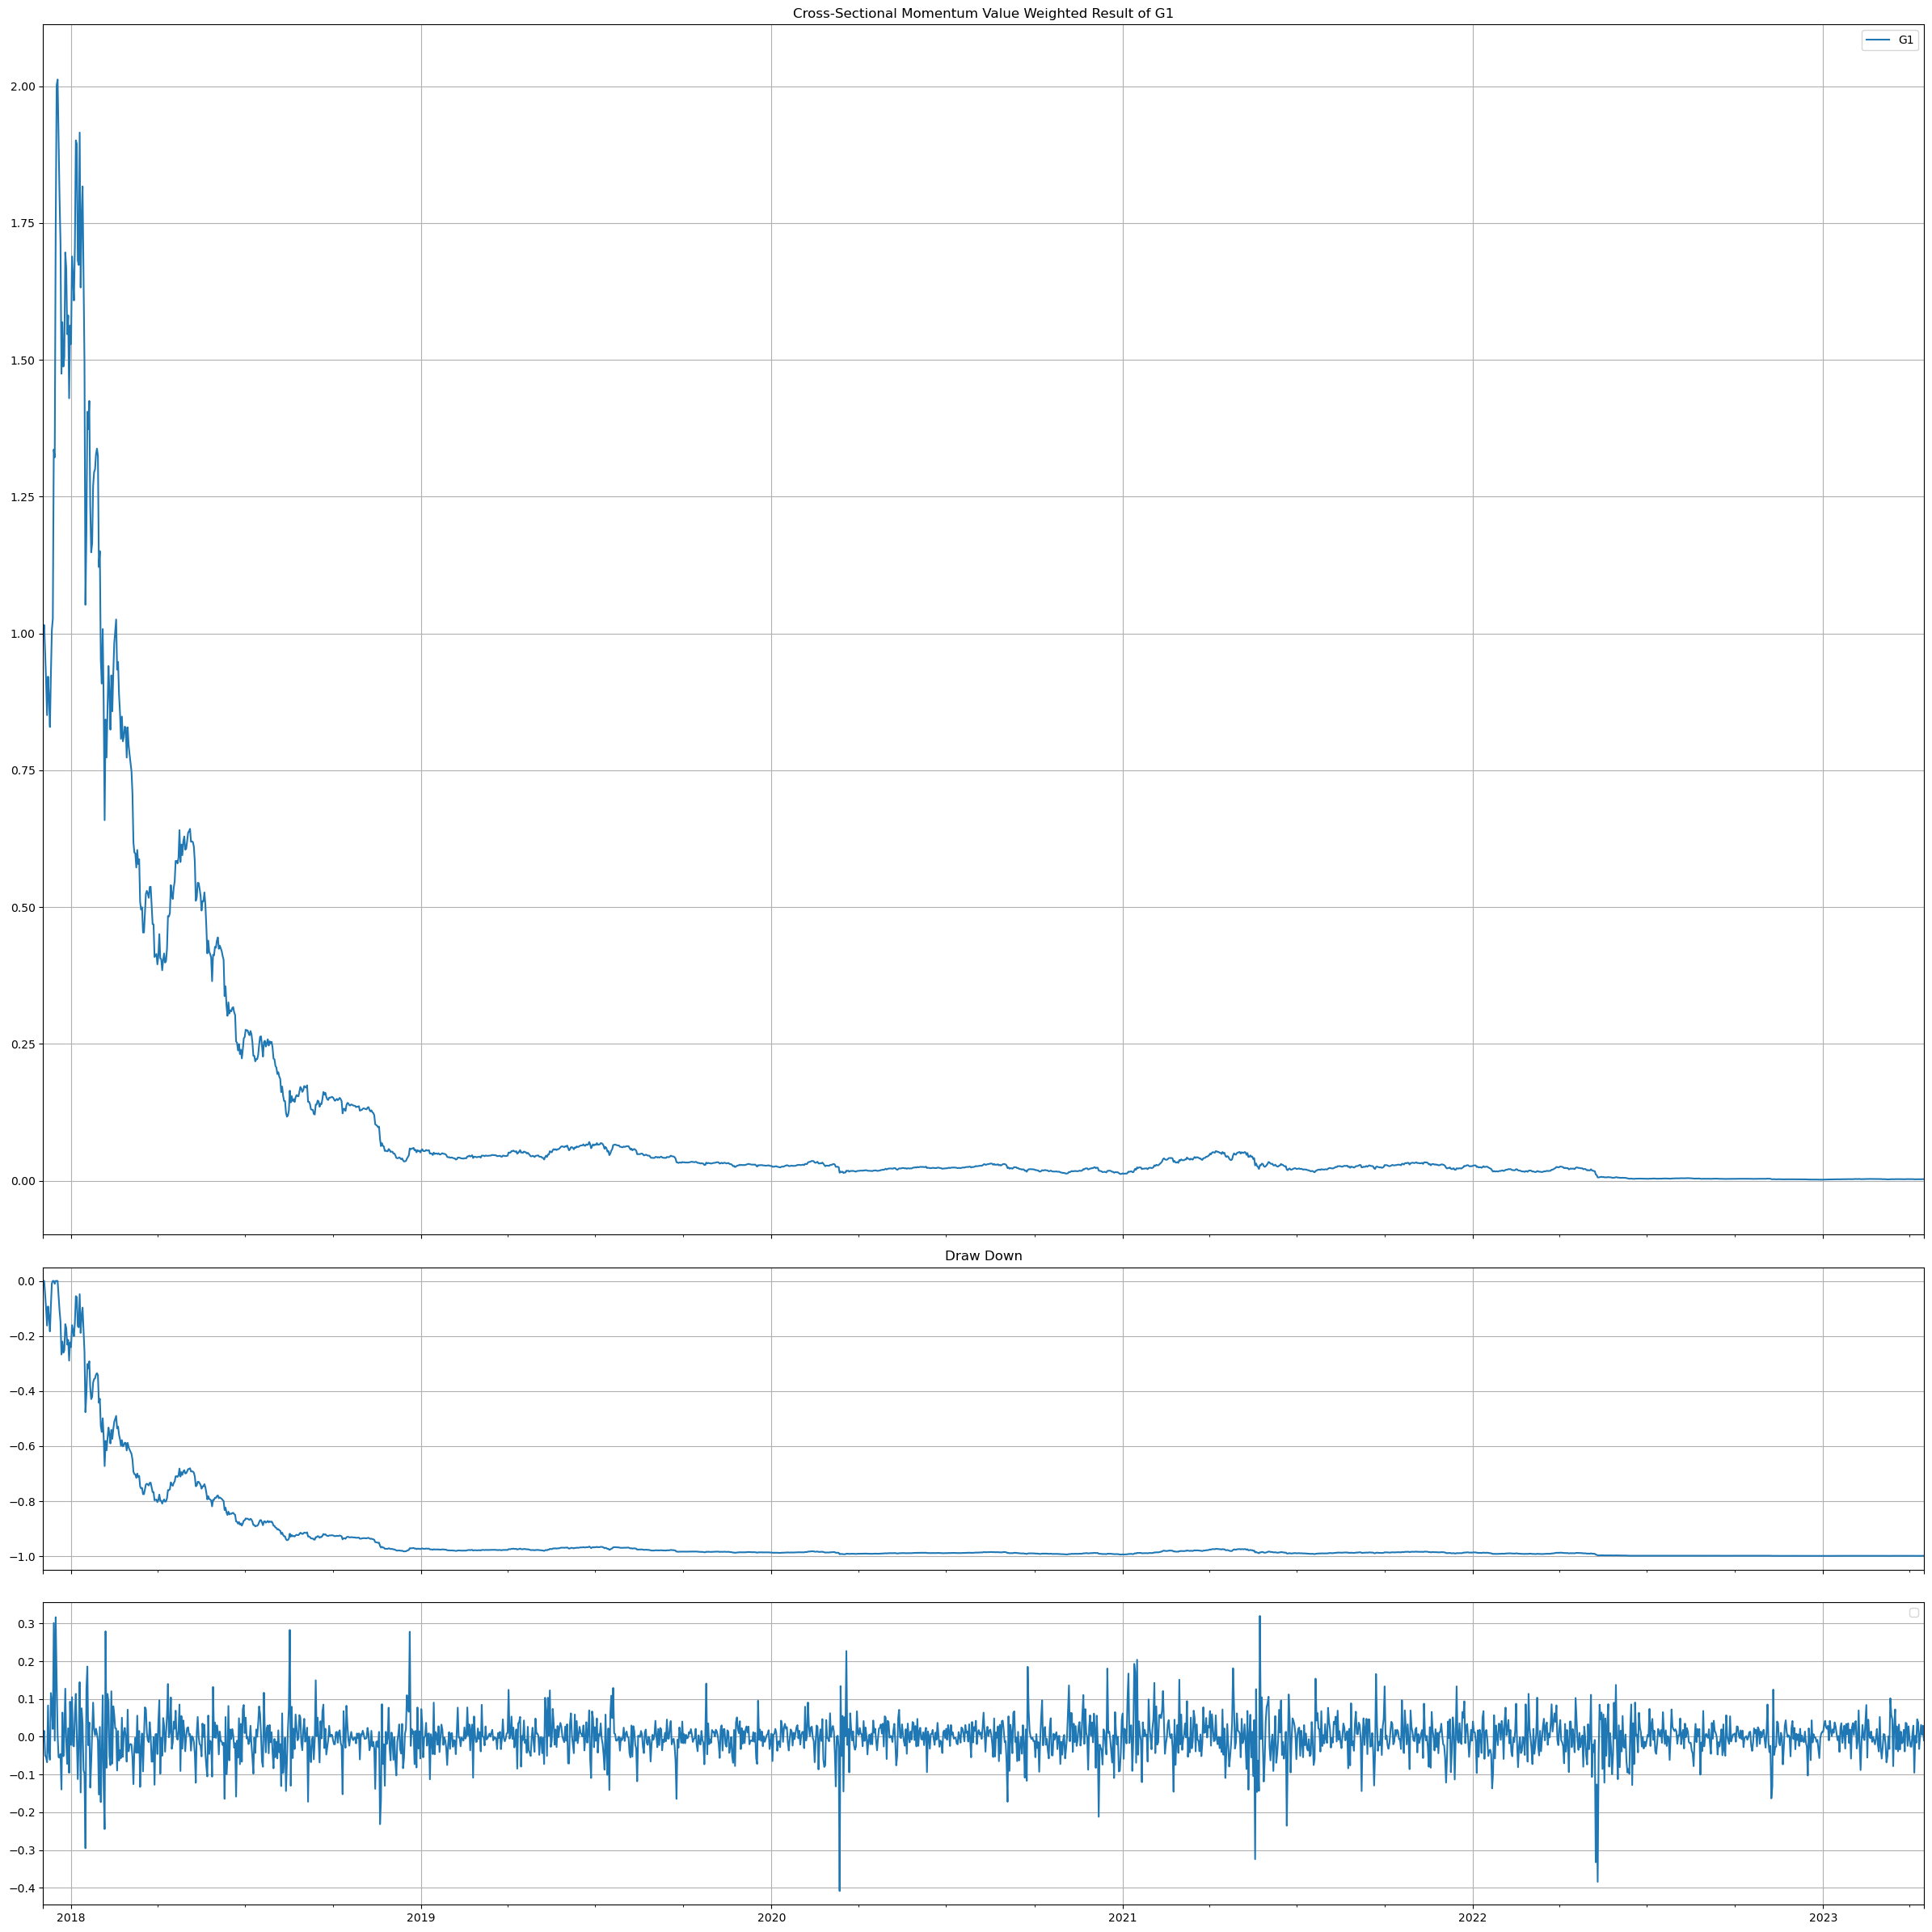

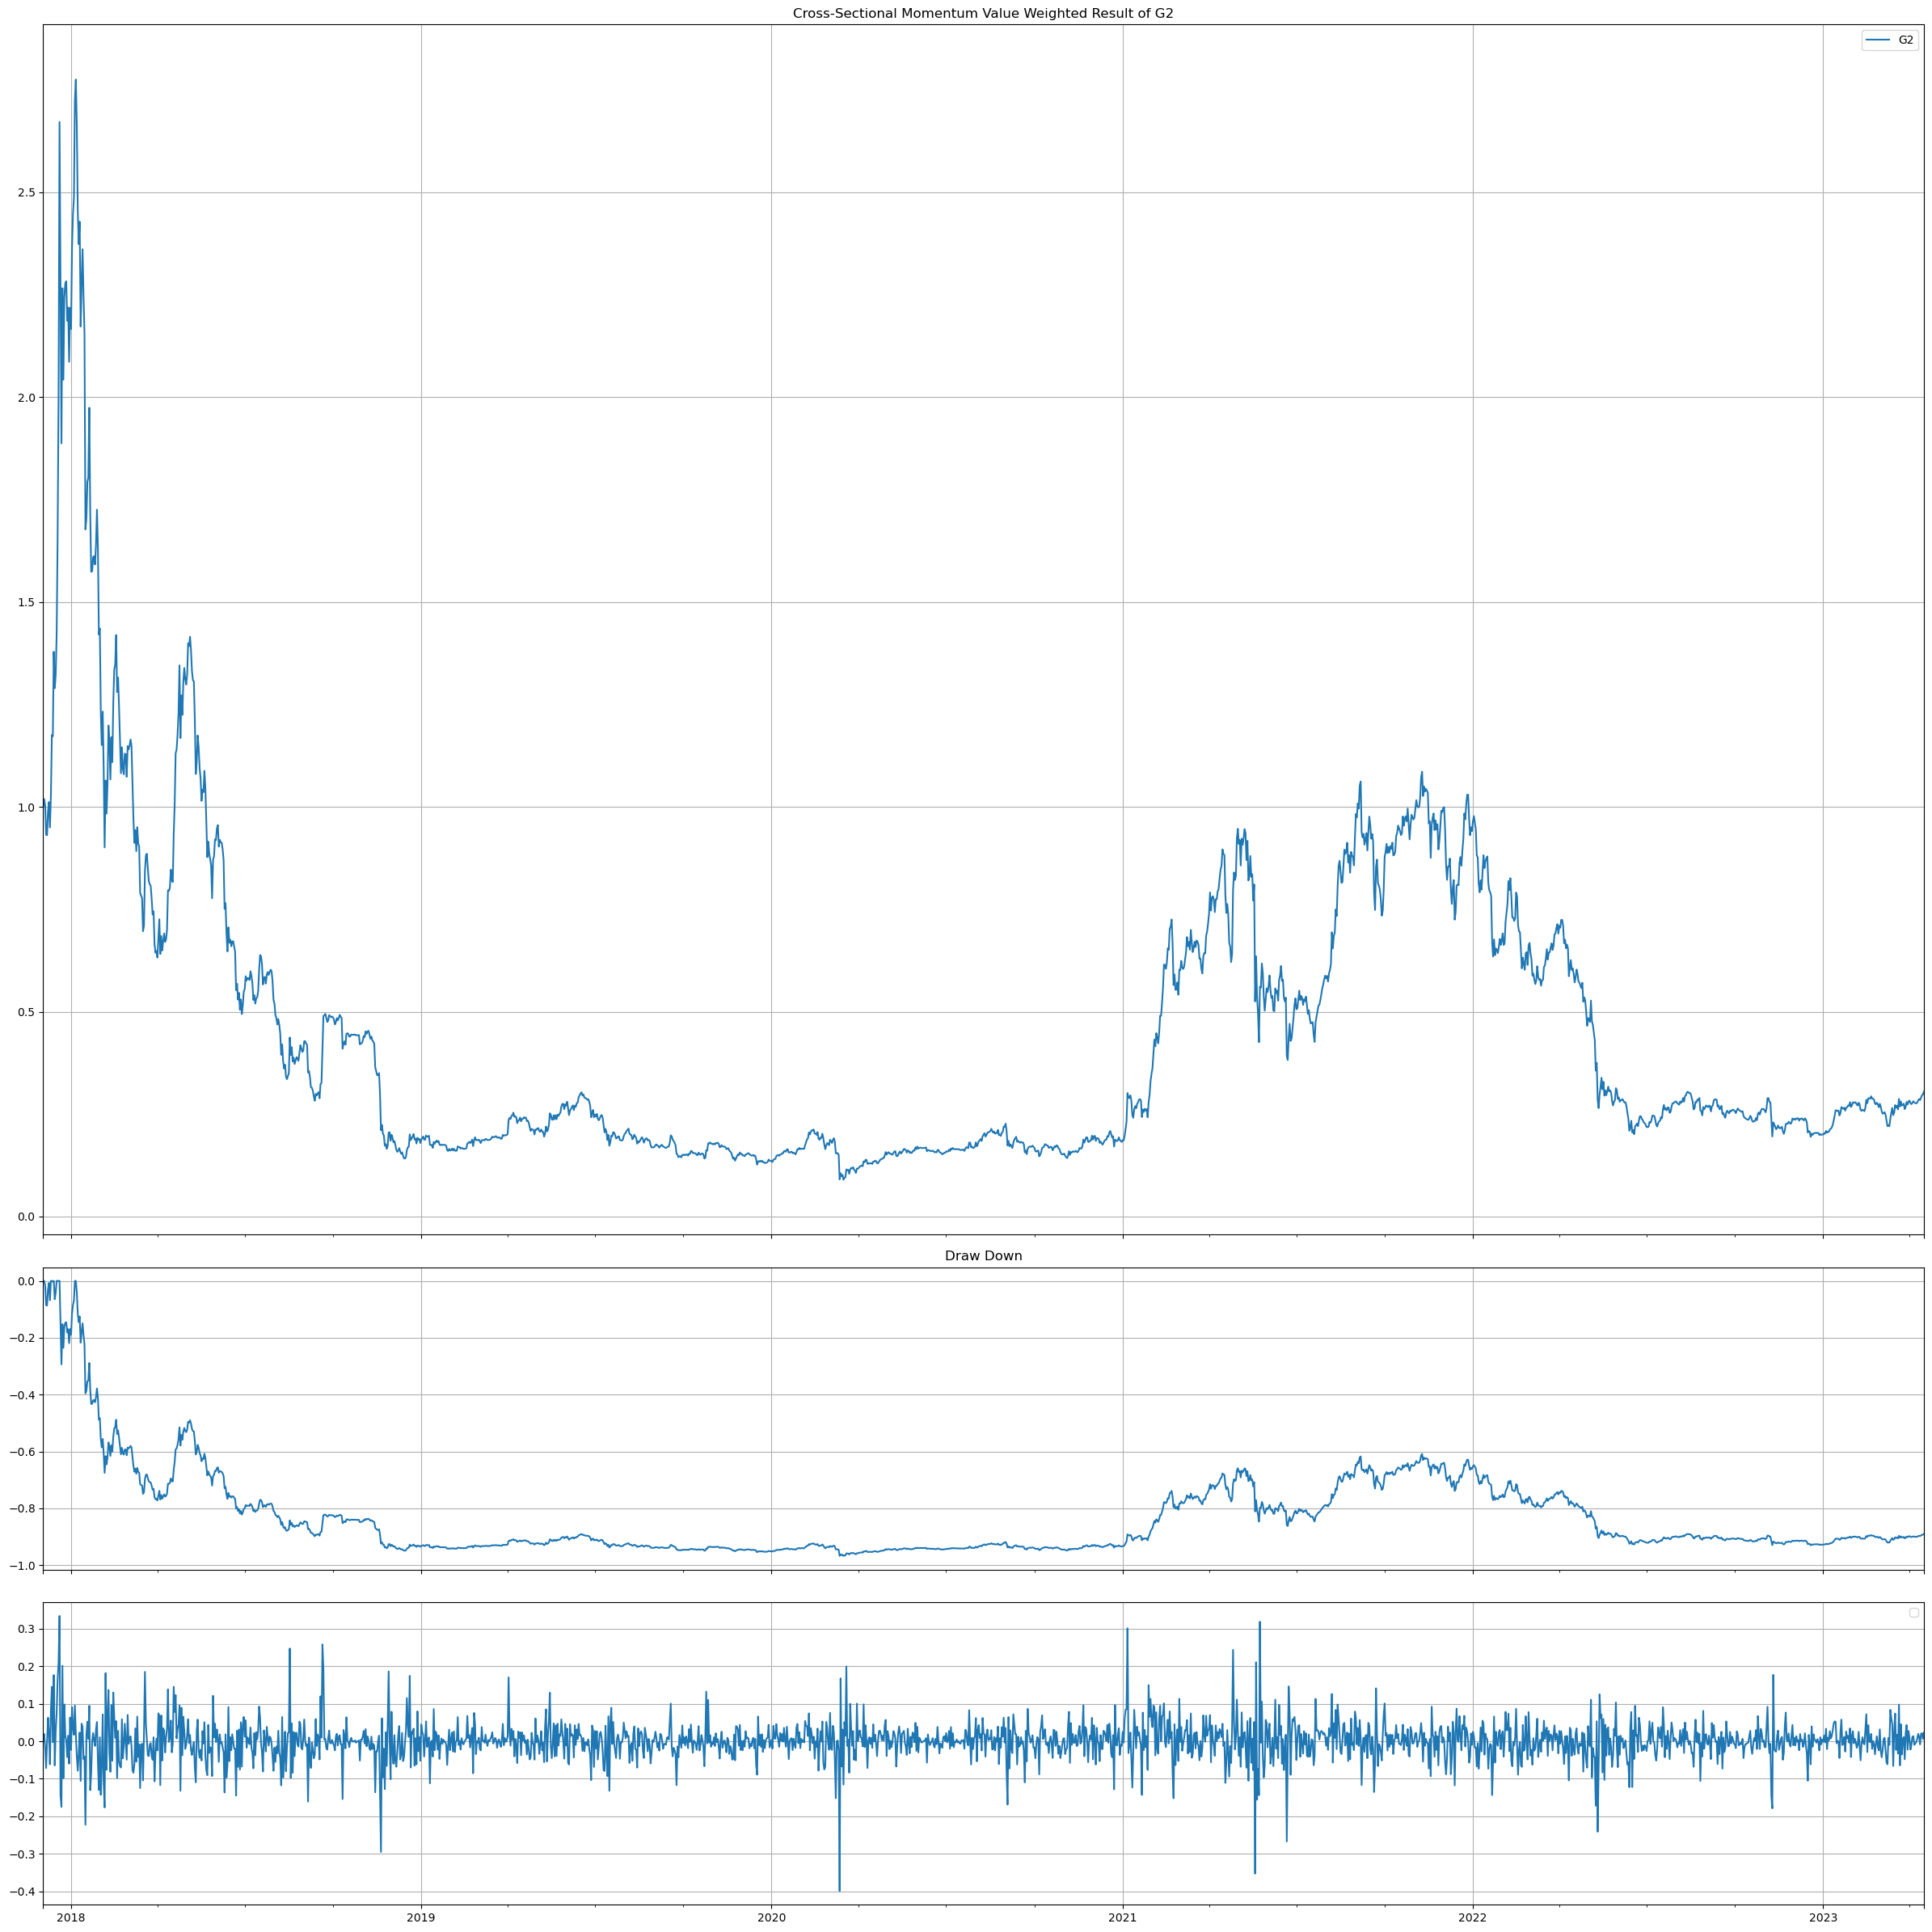

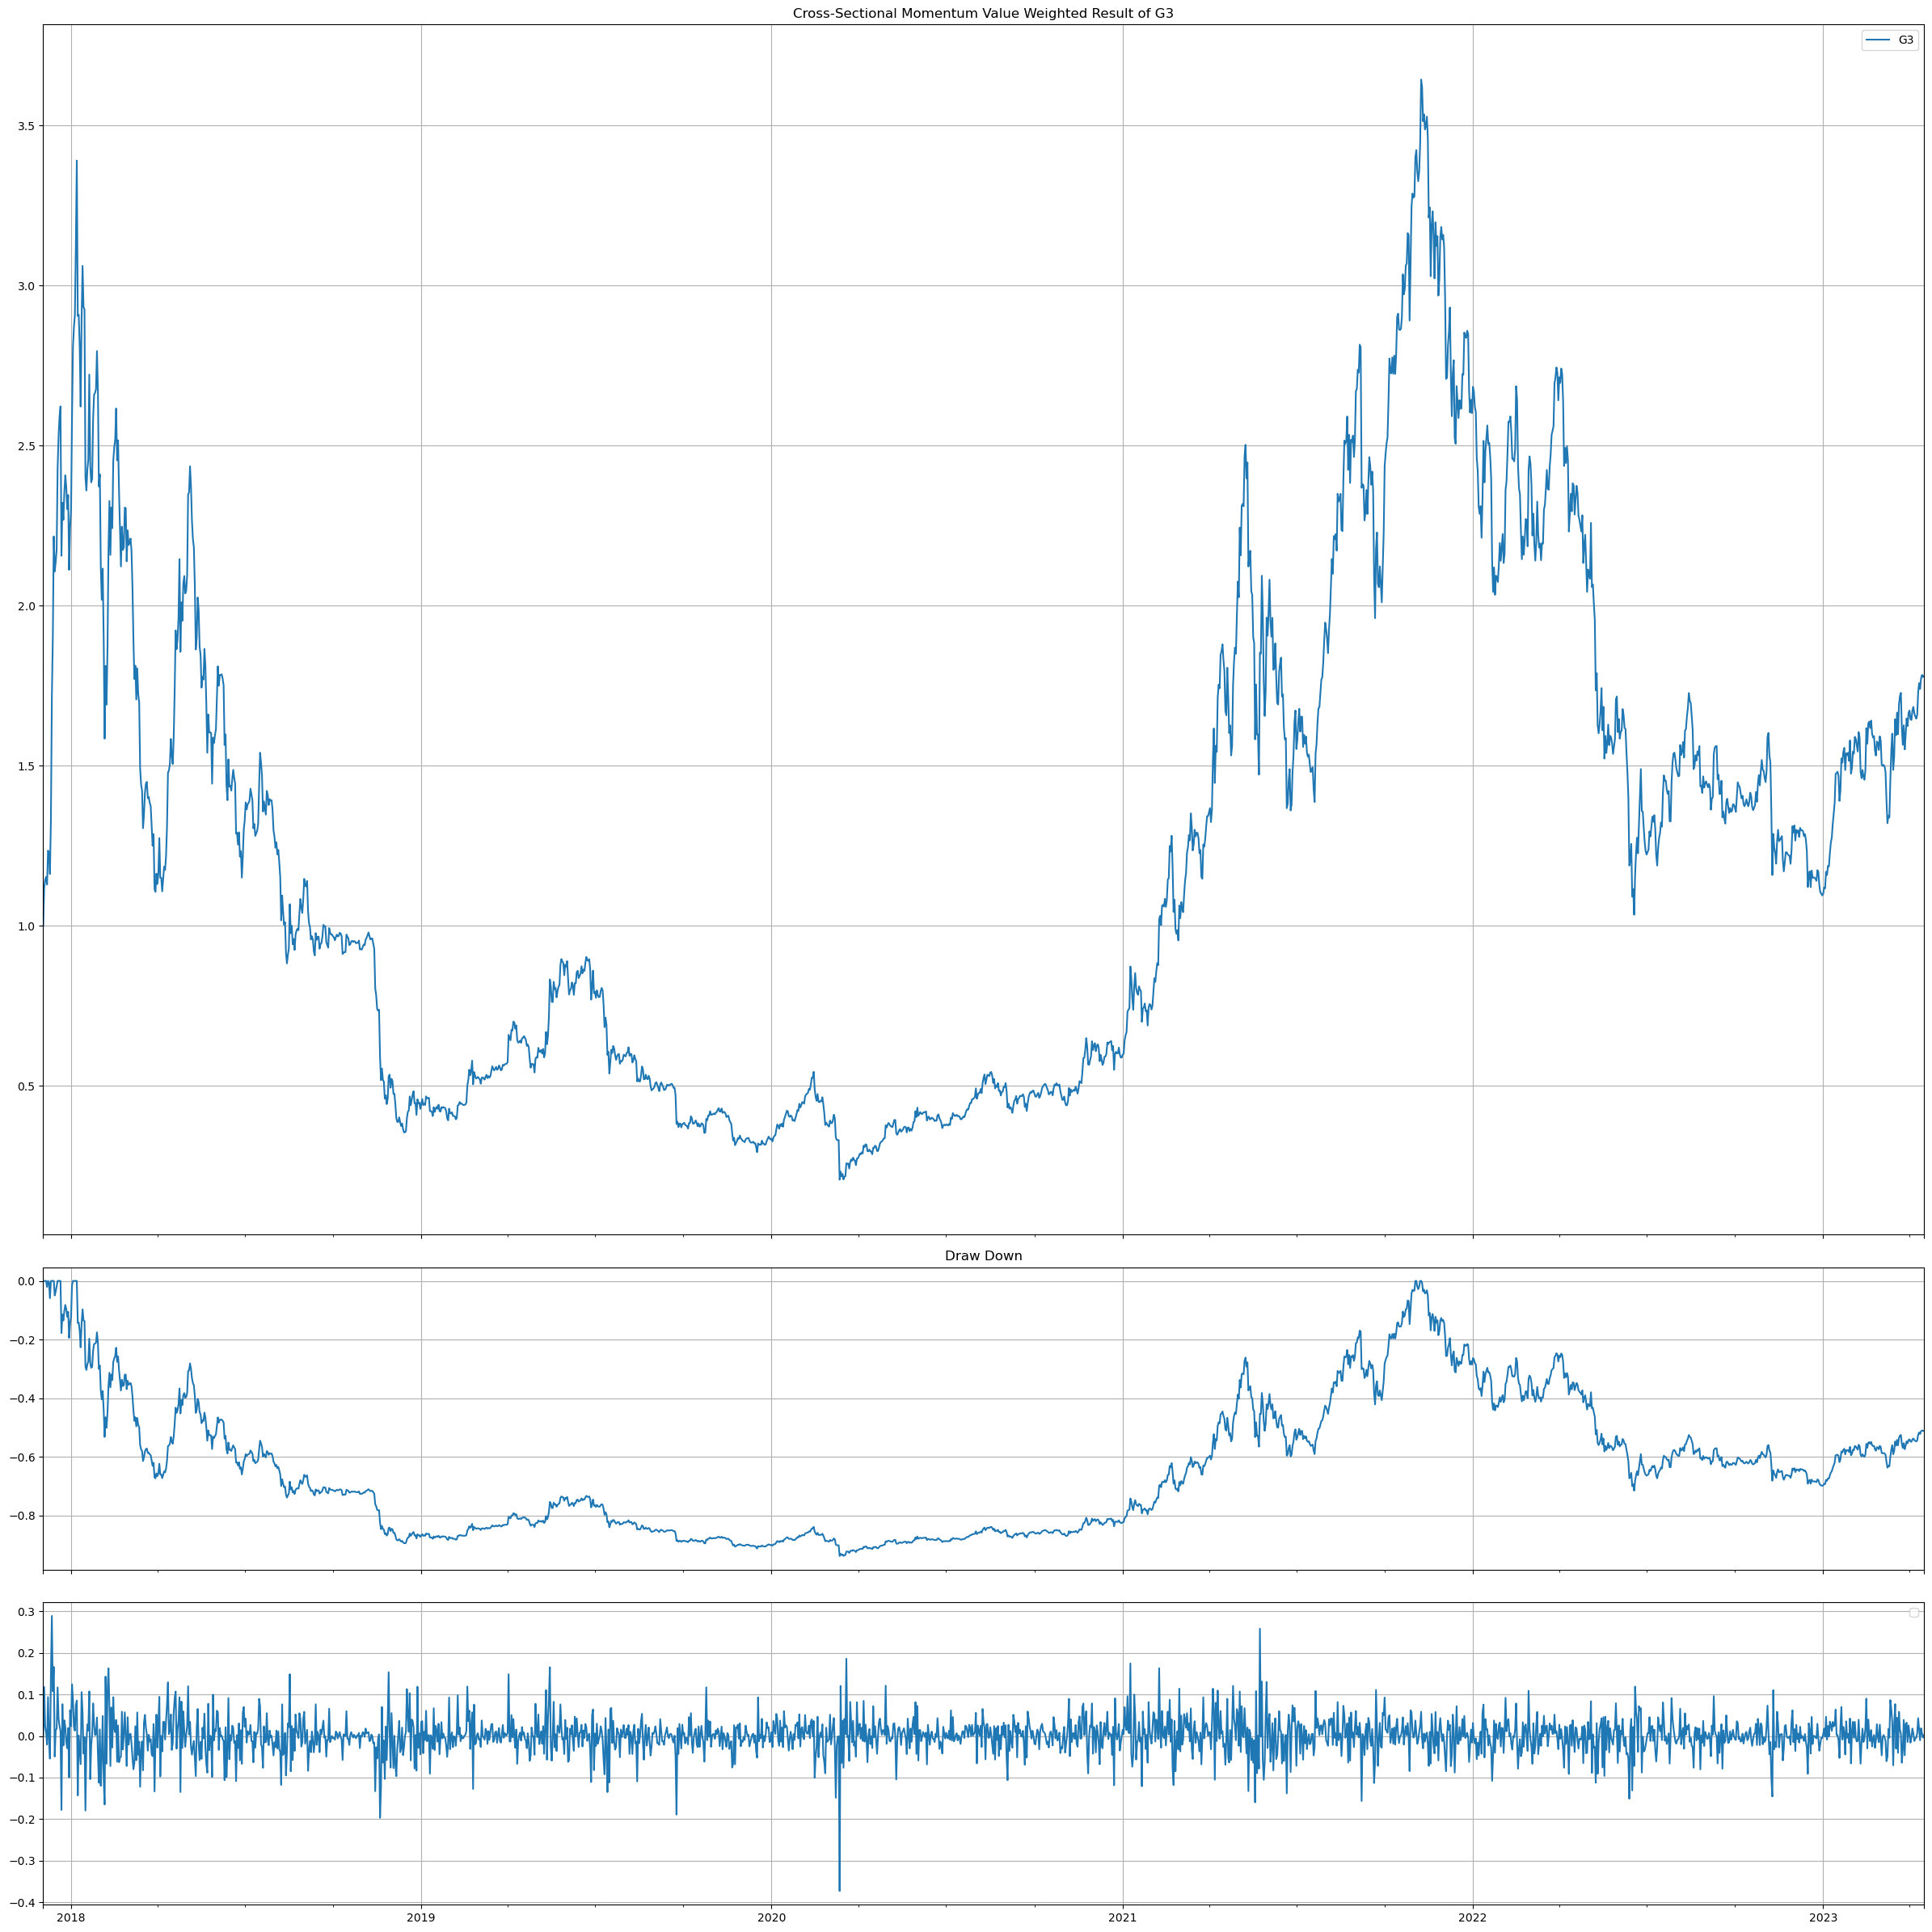

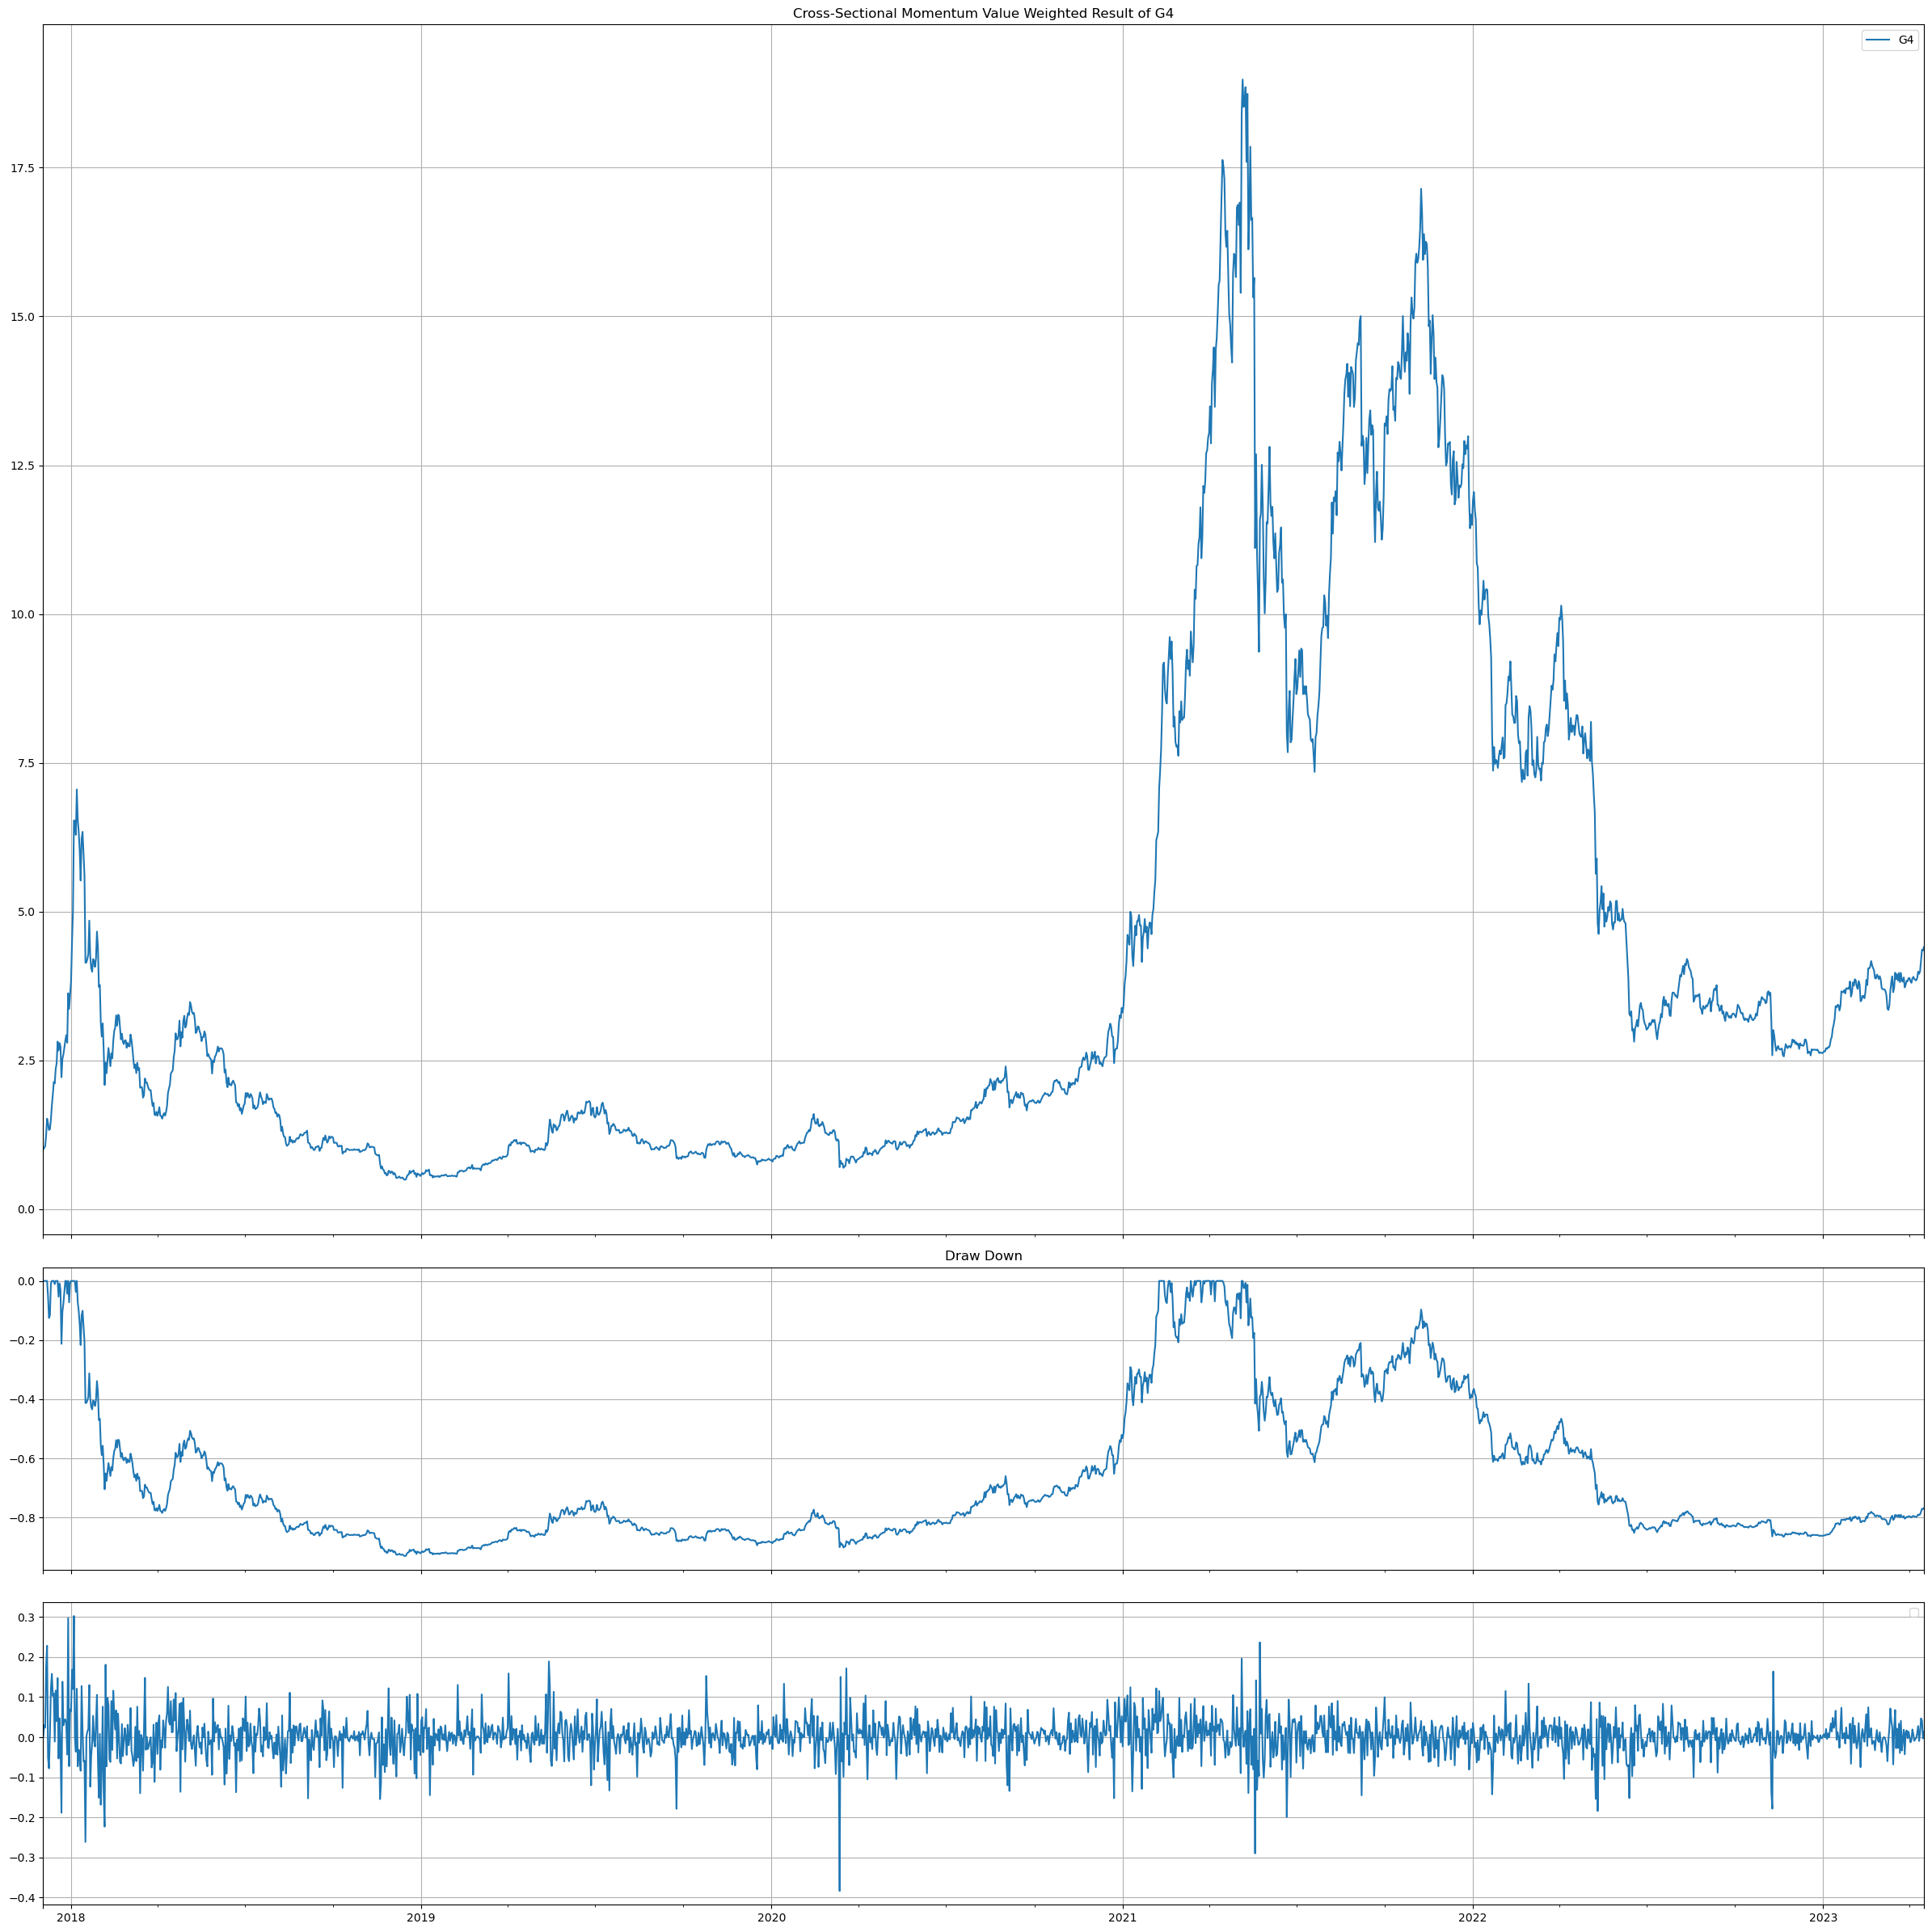

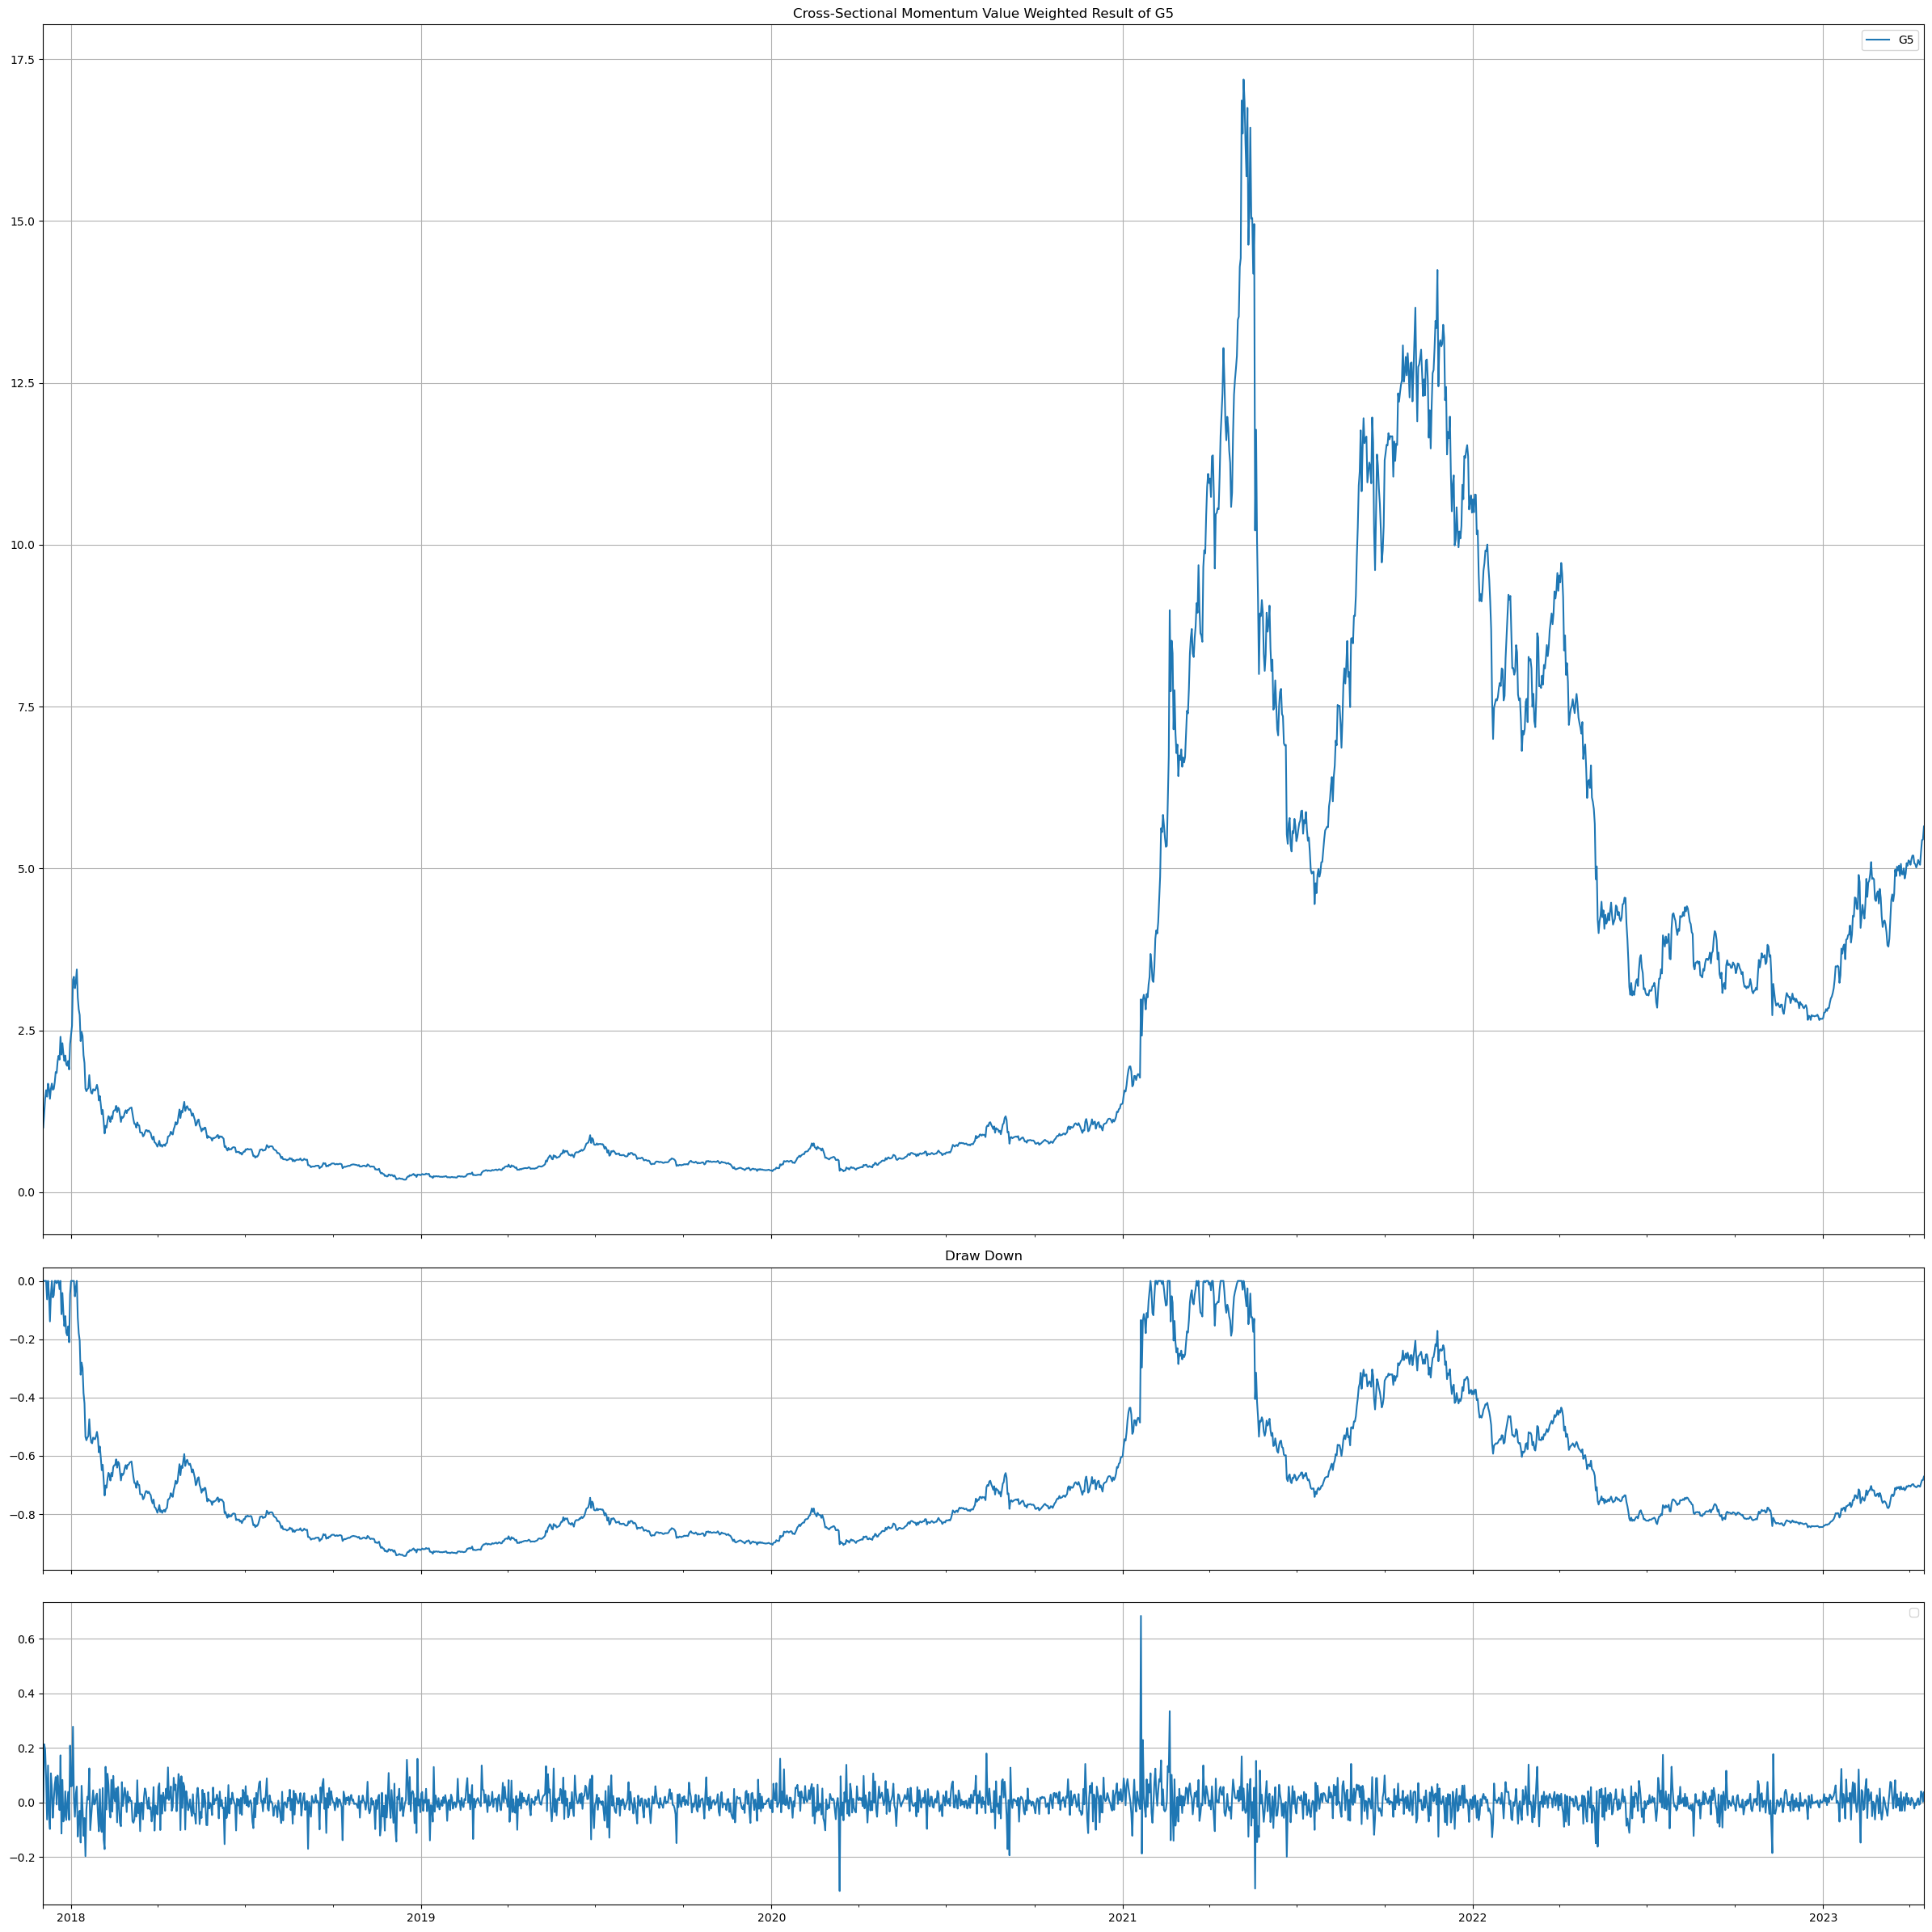

In [18]:
mytool.draw_return_result(momentum_cmktcap["M3"])

In [19]:
mytool.print_statistics(momentum_cmktcap["M3"])

0         1         2         3         4
CAGR   -0.663700 -0.201300  0.090500  0.310600  0.331700
Mean   -0.512140  0.275550  0.484790  0.716730  0.812990
STD     1.055709  0.988523  0.863403  0.931187  0.999042
MDD     0.999000  0.968000  0.939000  0.930000  0.943000
Sharpe -0.485115  0.278749  0.561488  0.769695  0.813770

In [20]:
# 코인 마켓켑 
momentum_cmktcap_reduced = {}
momentum_num_cmktcap_reduced = {}

for key, value_lst in group_value.items():
    rtn, num = c_mkt_reduced.weekly_momentum_w(4,"SUN", 15, value_lst[0],value_lst[1])
    momentum_cmktcap_reduced[key] = rtn
    momentum_num_cmktcap_reduced[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

100%|██████████| 4/4 [00:01<00:00,  2.24it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


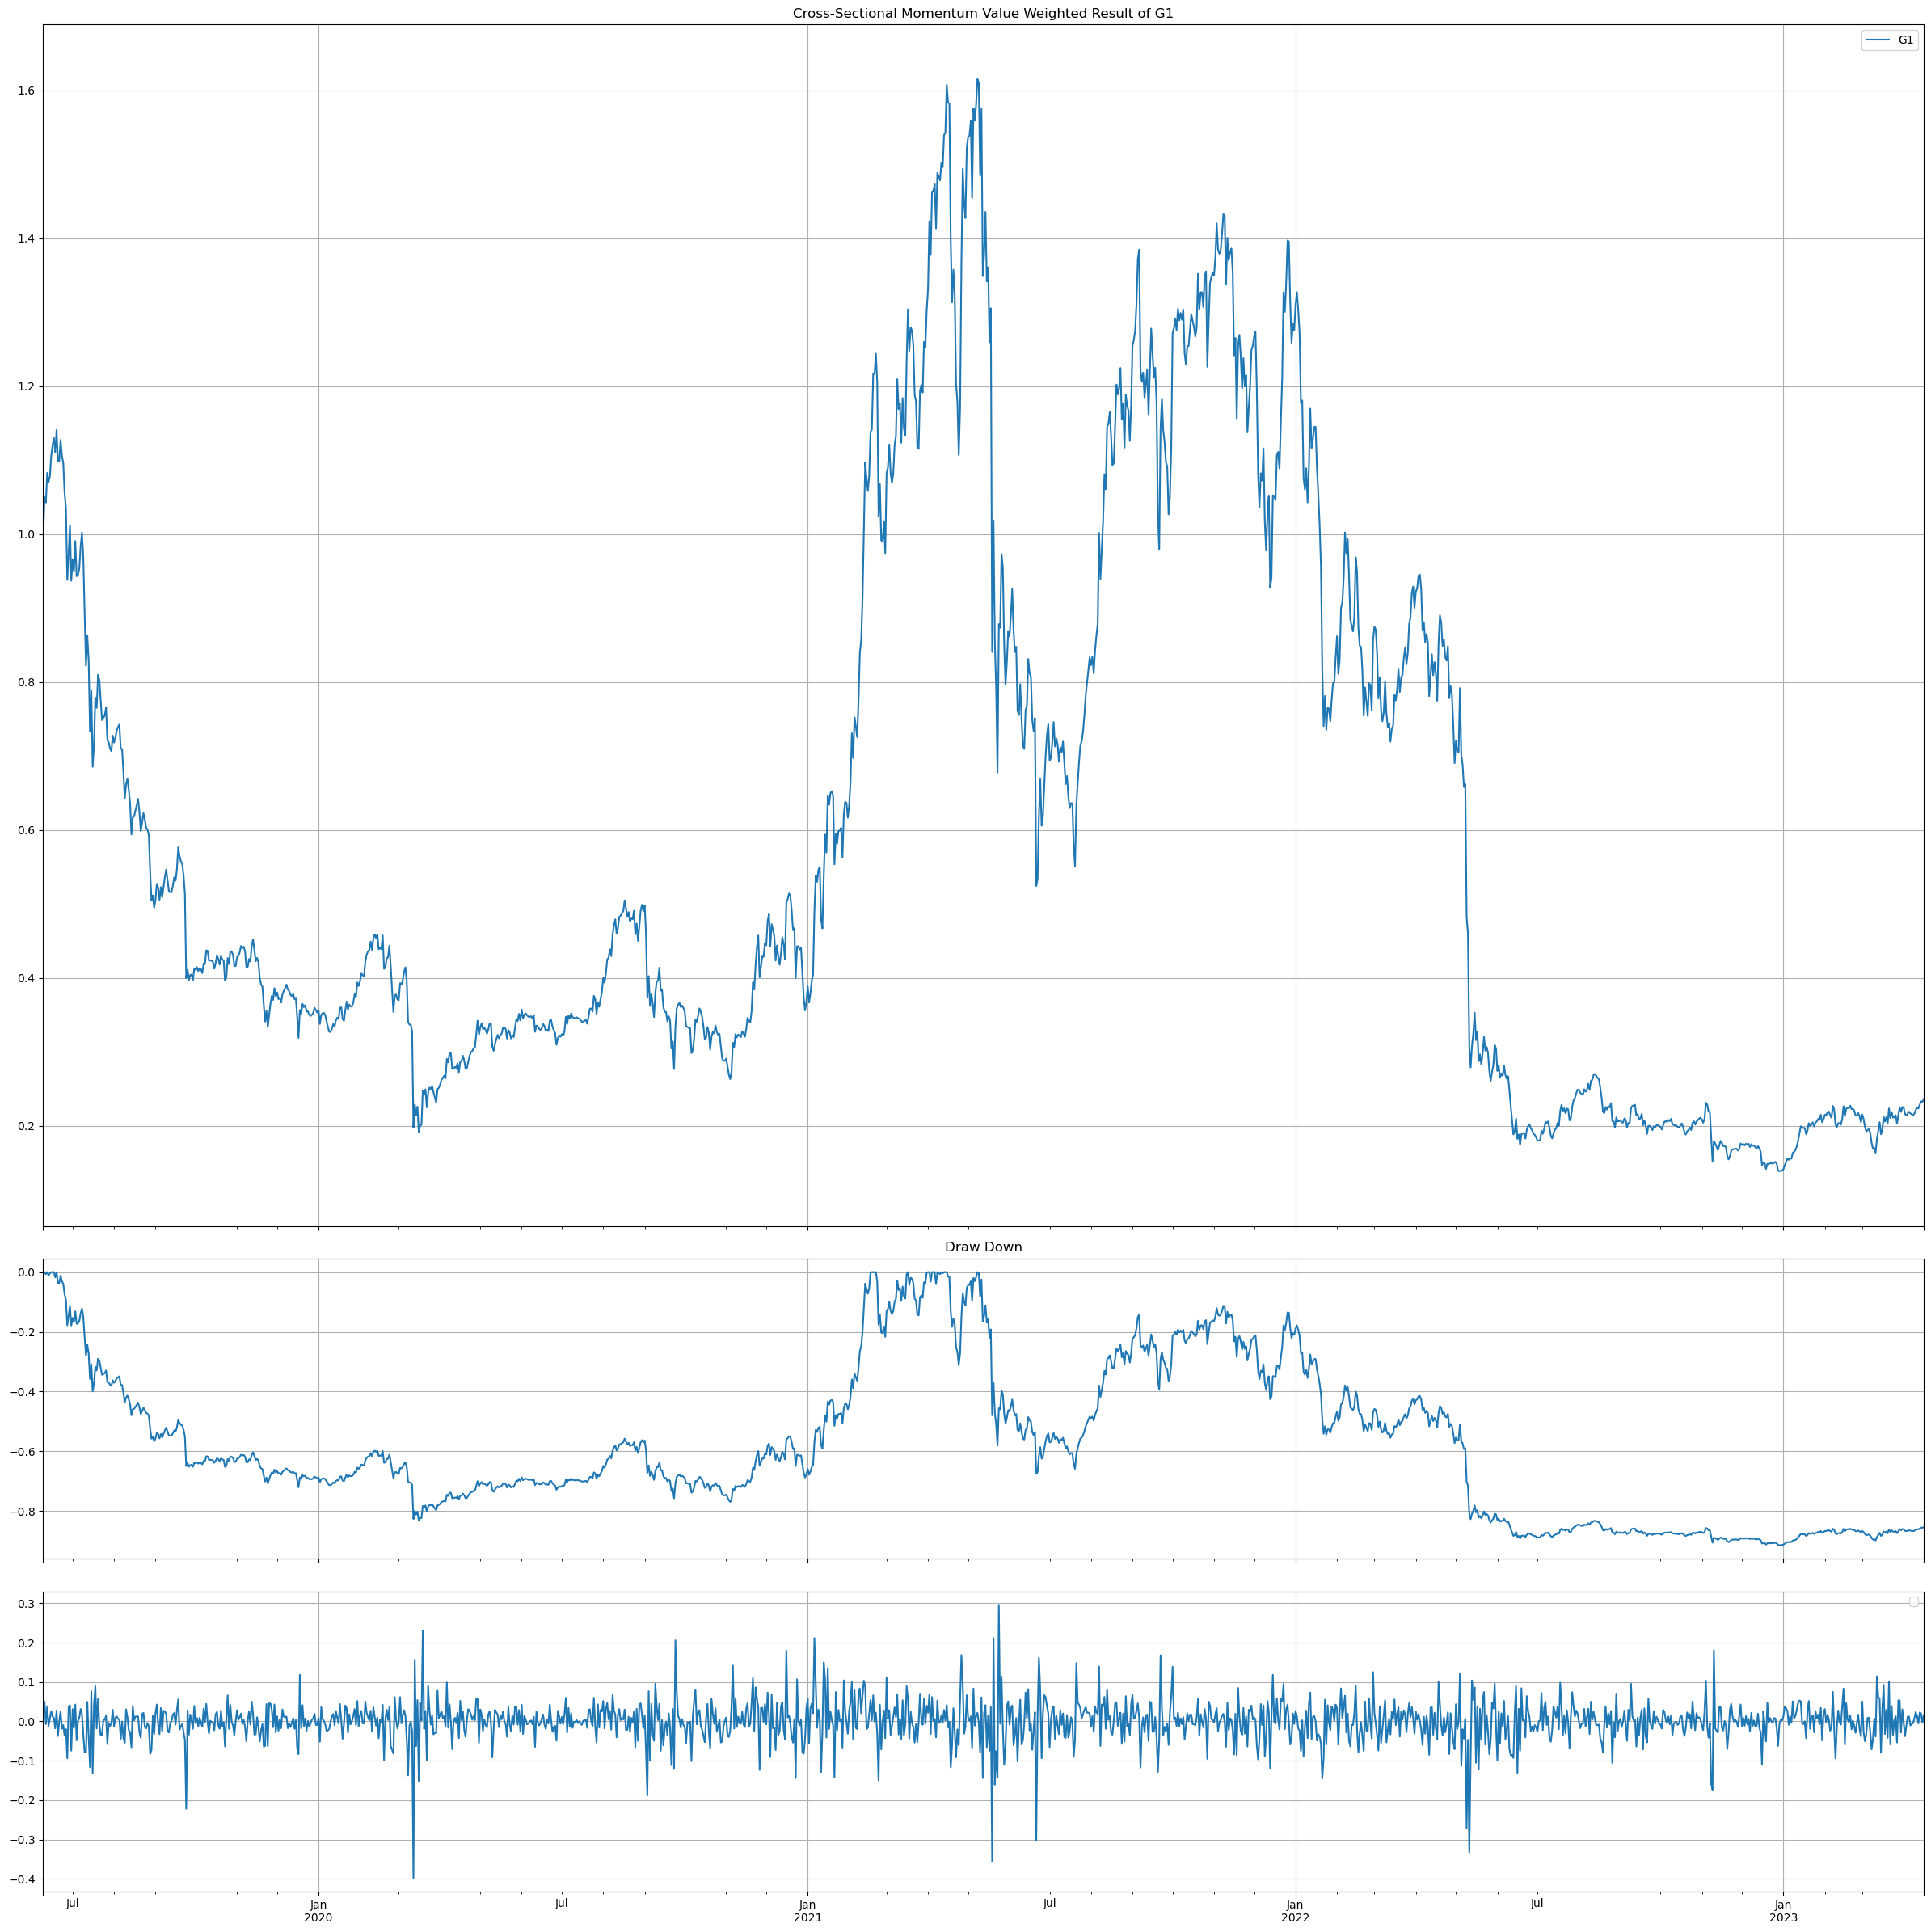

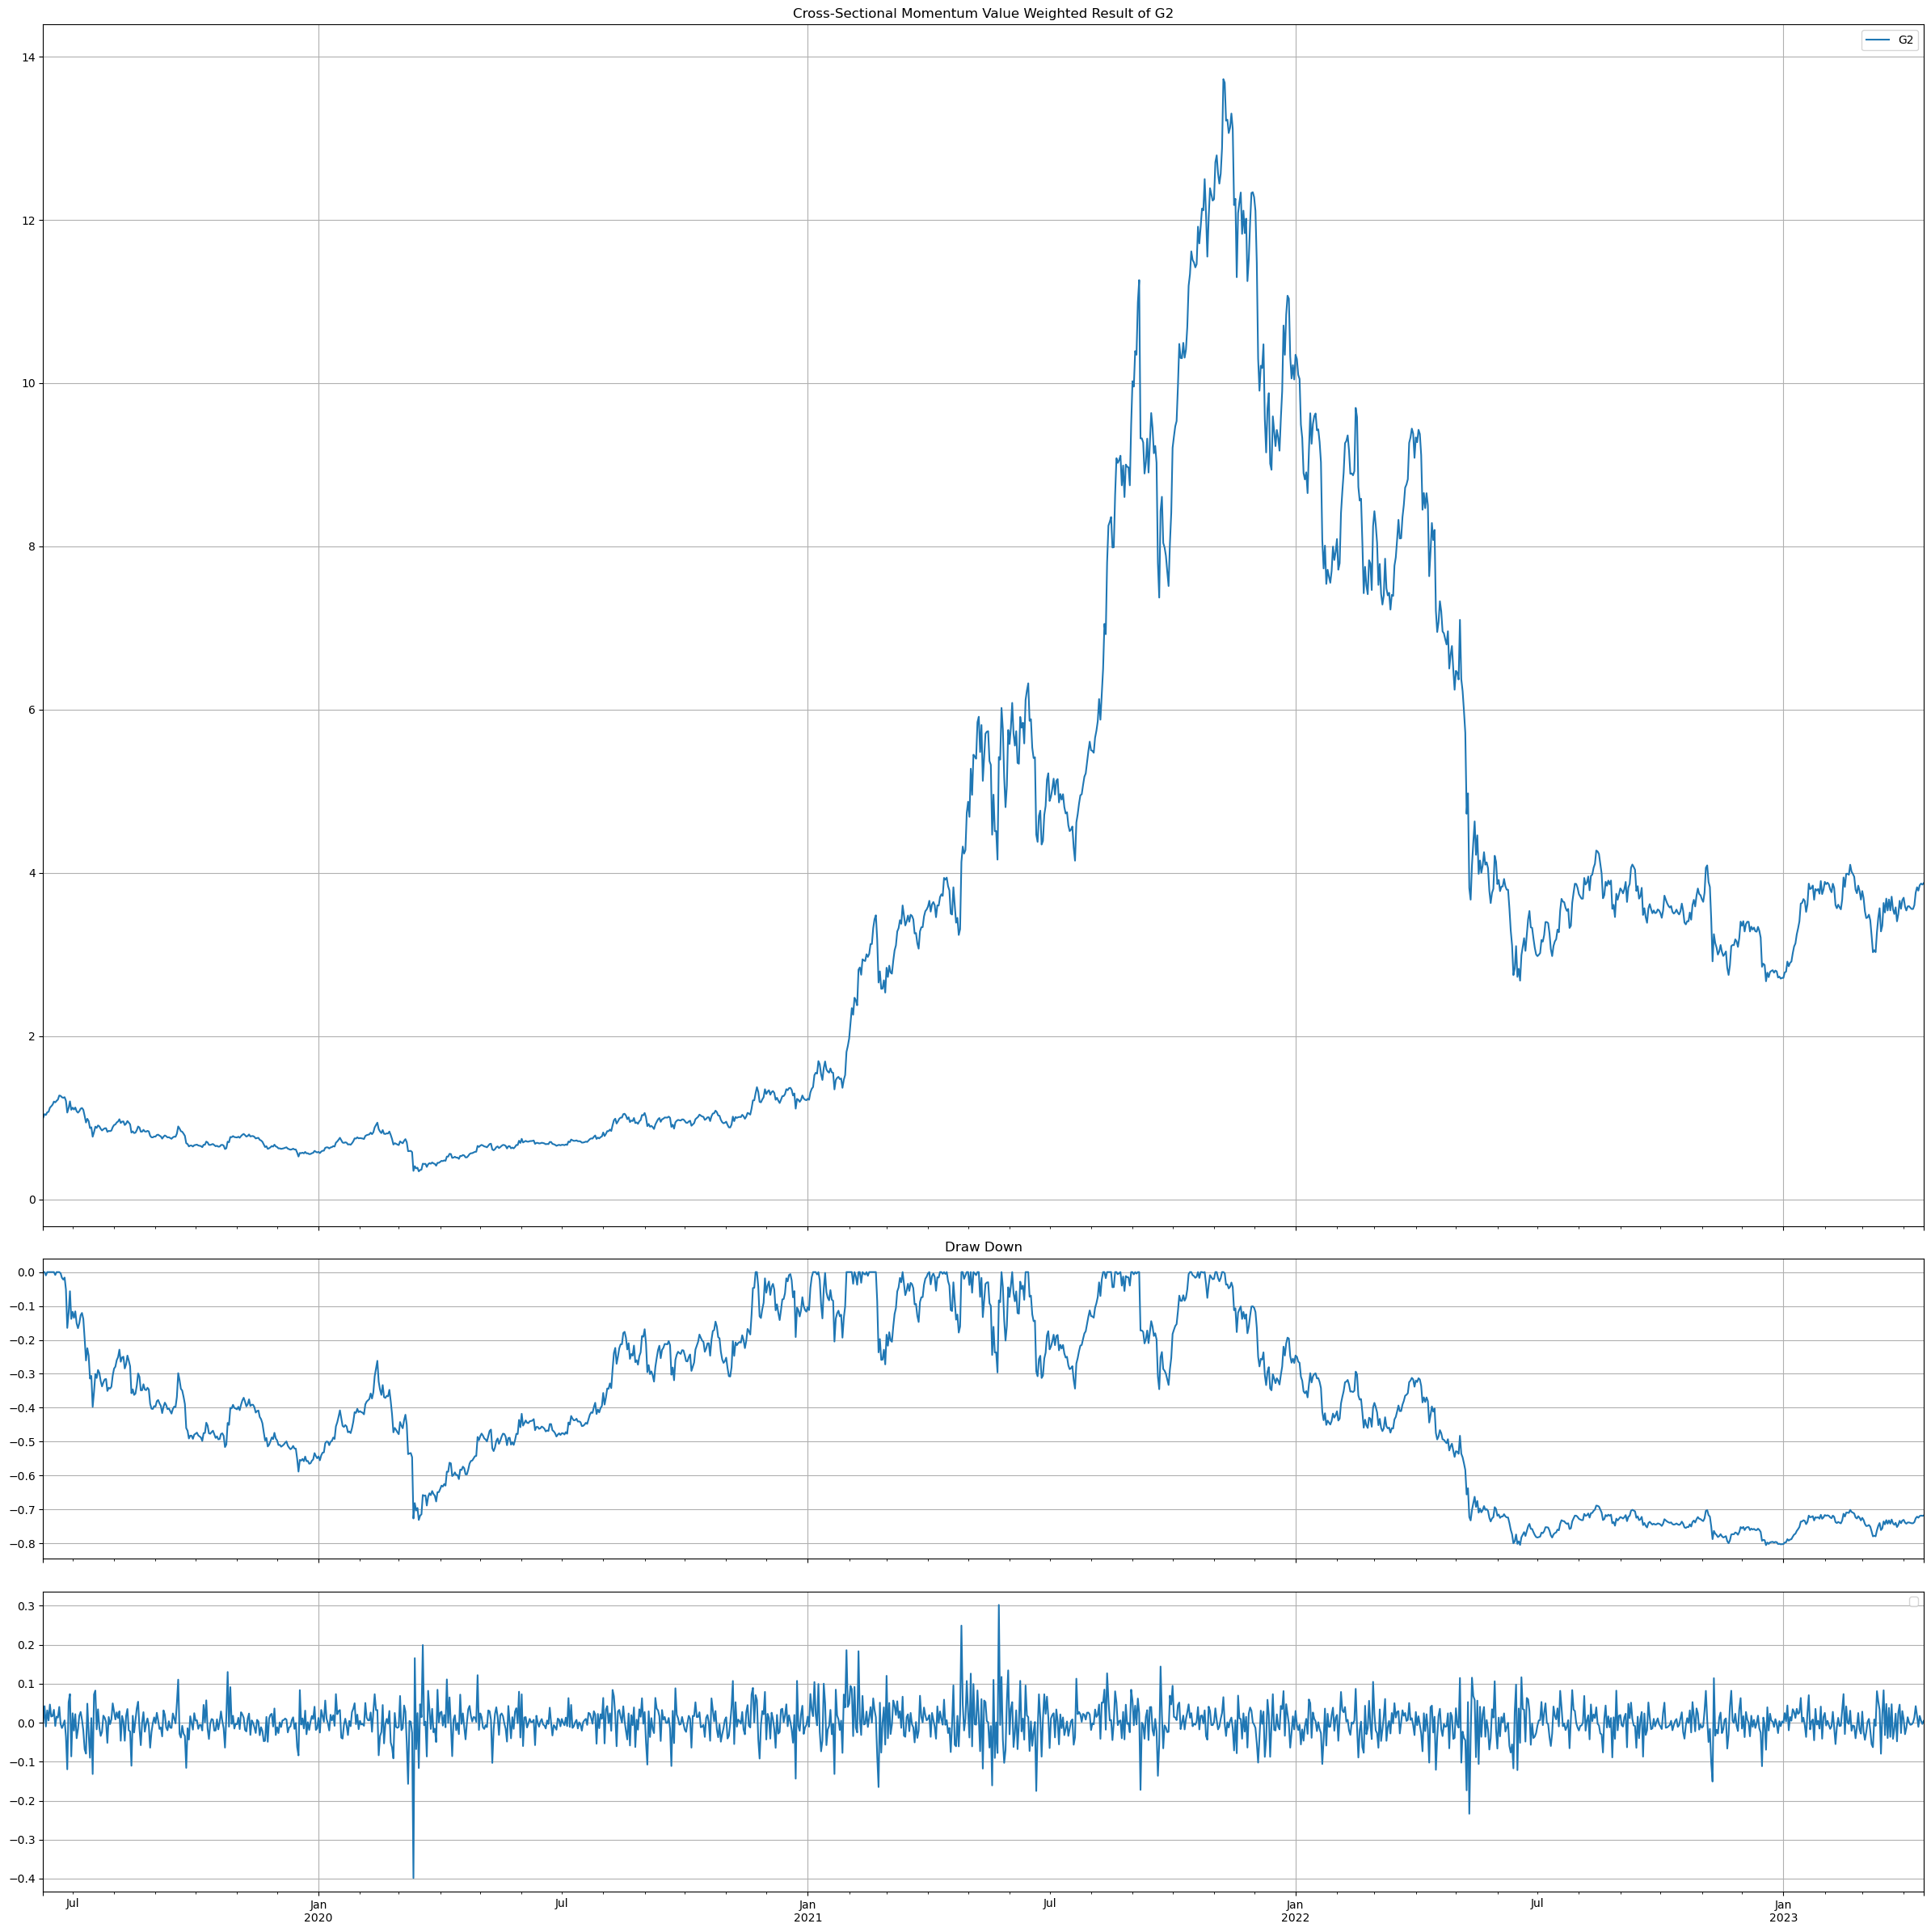

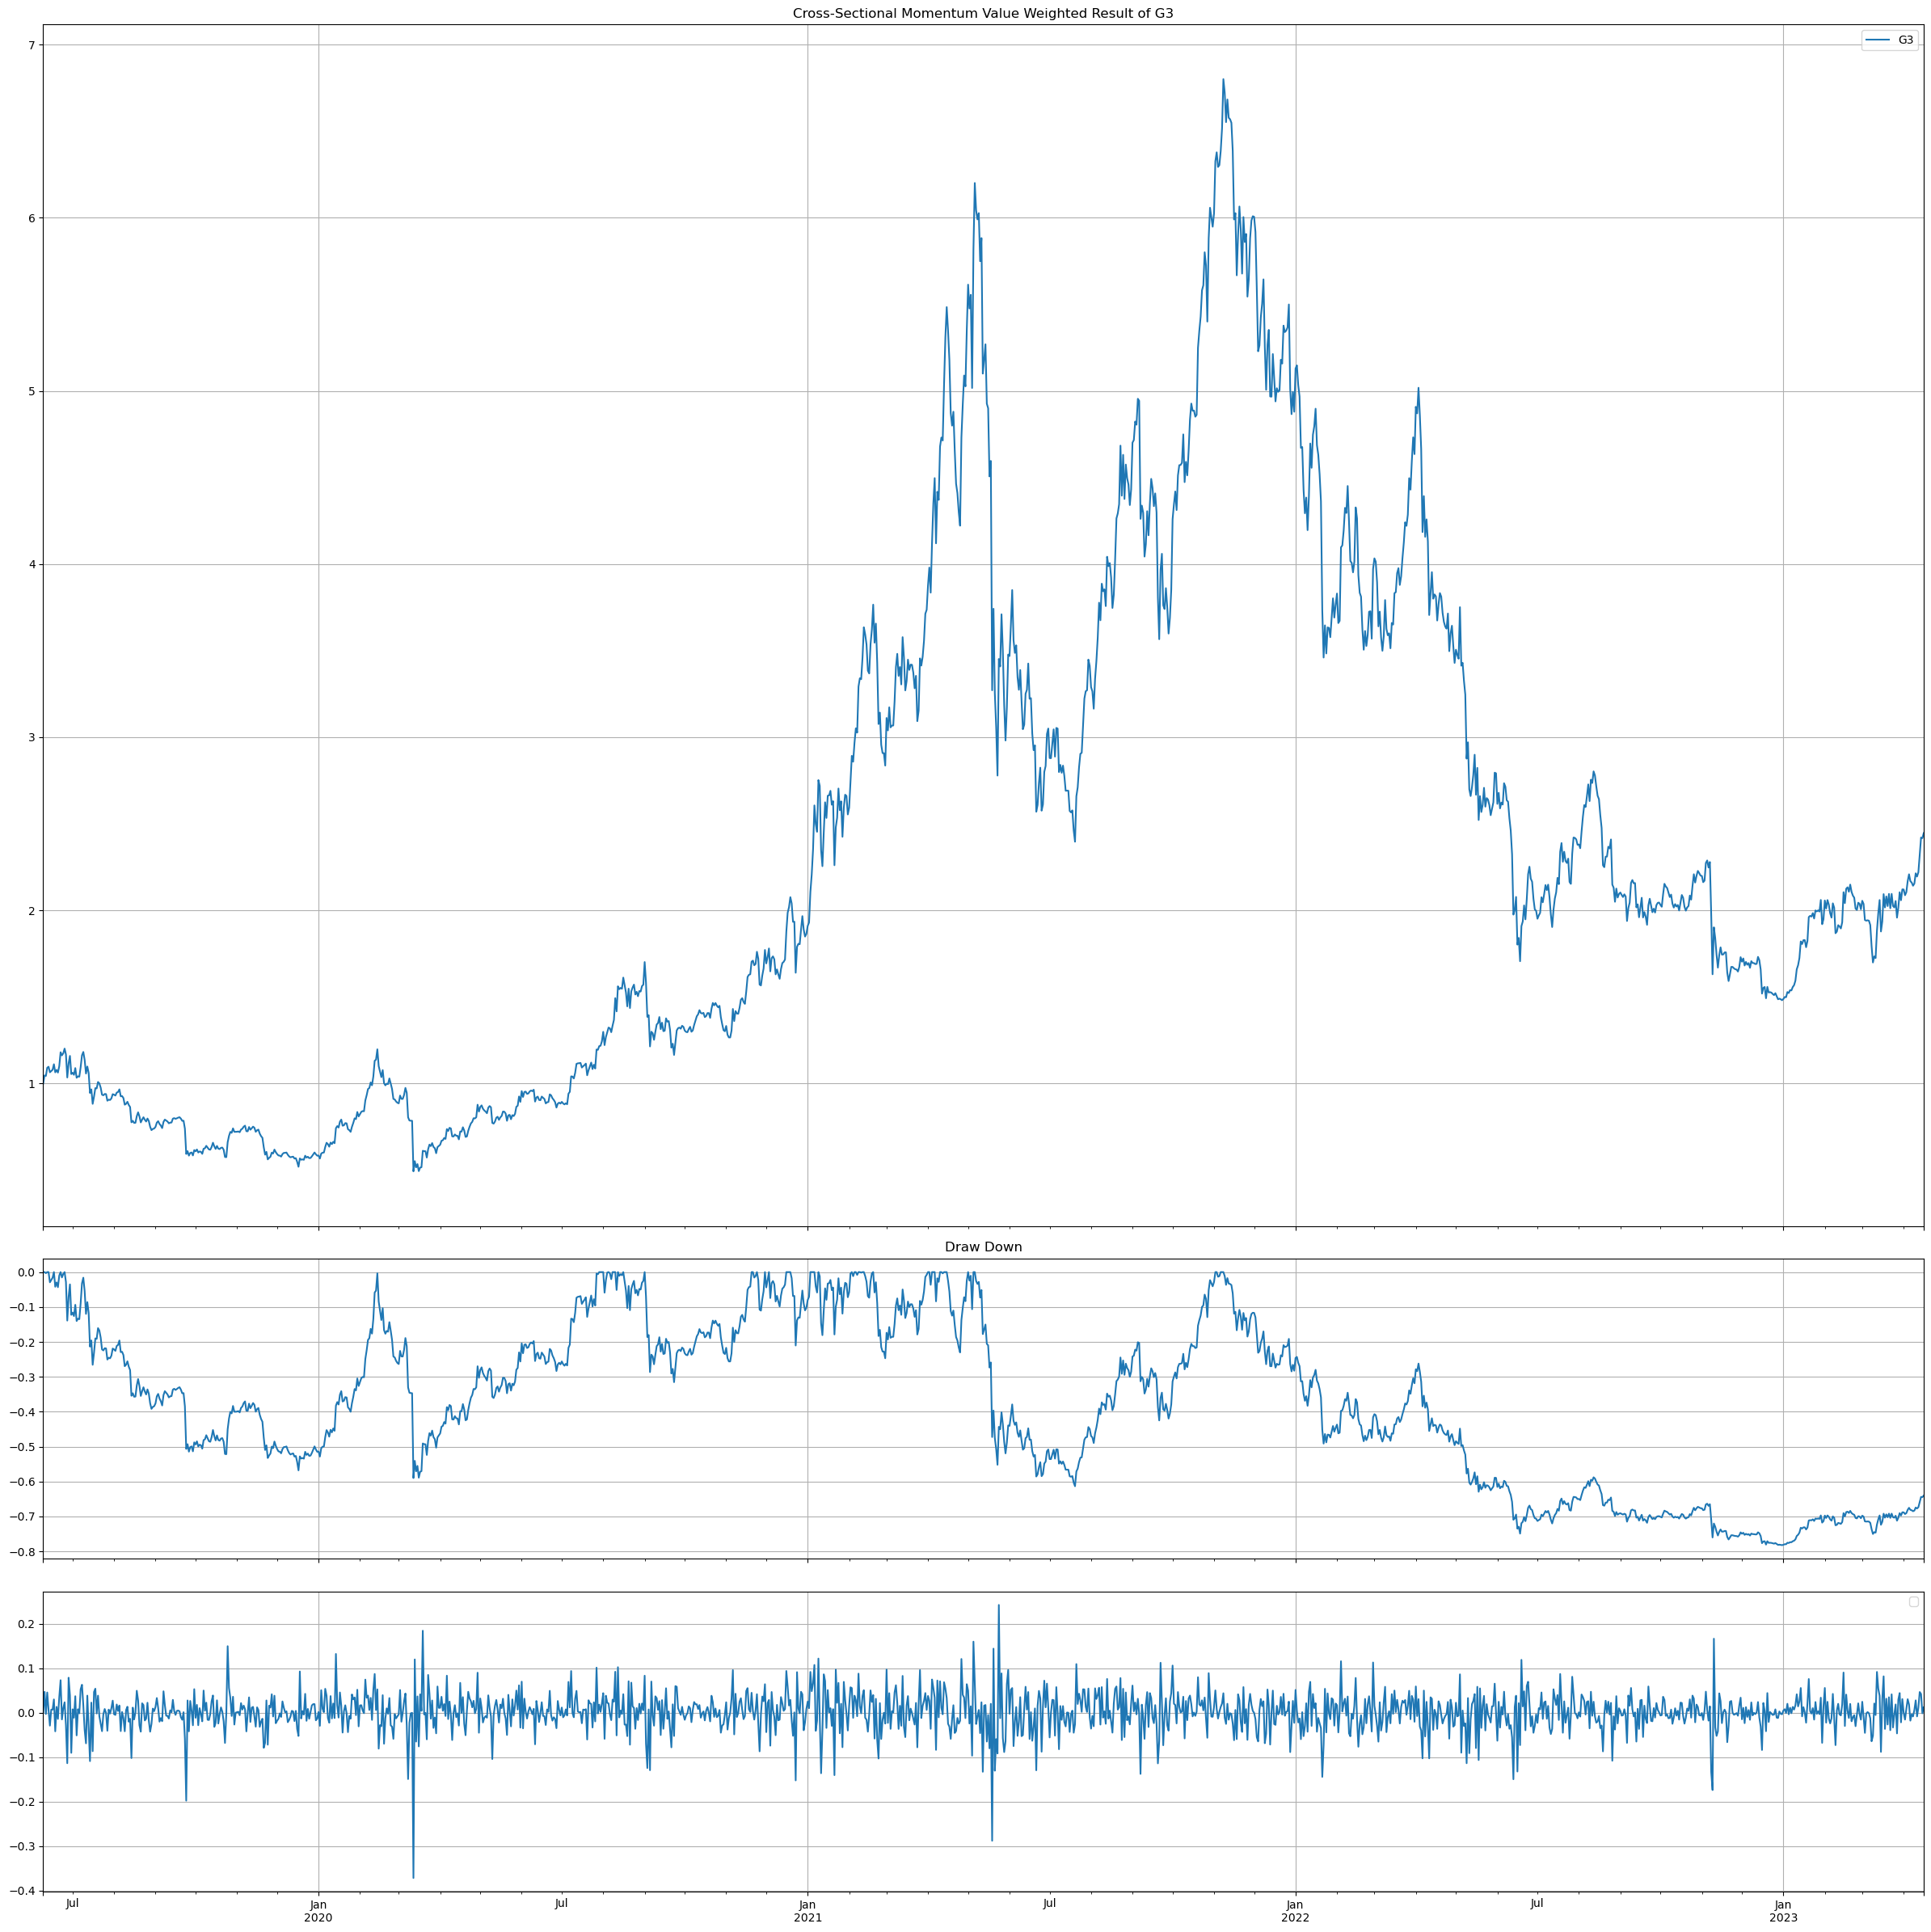

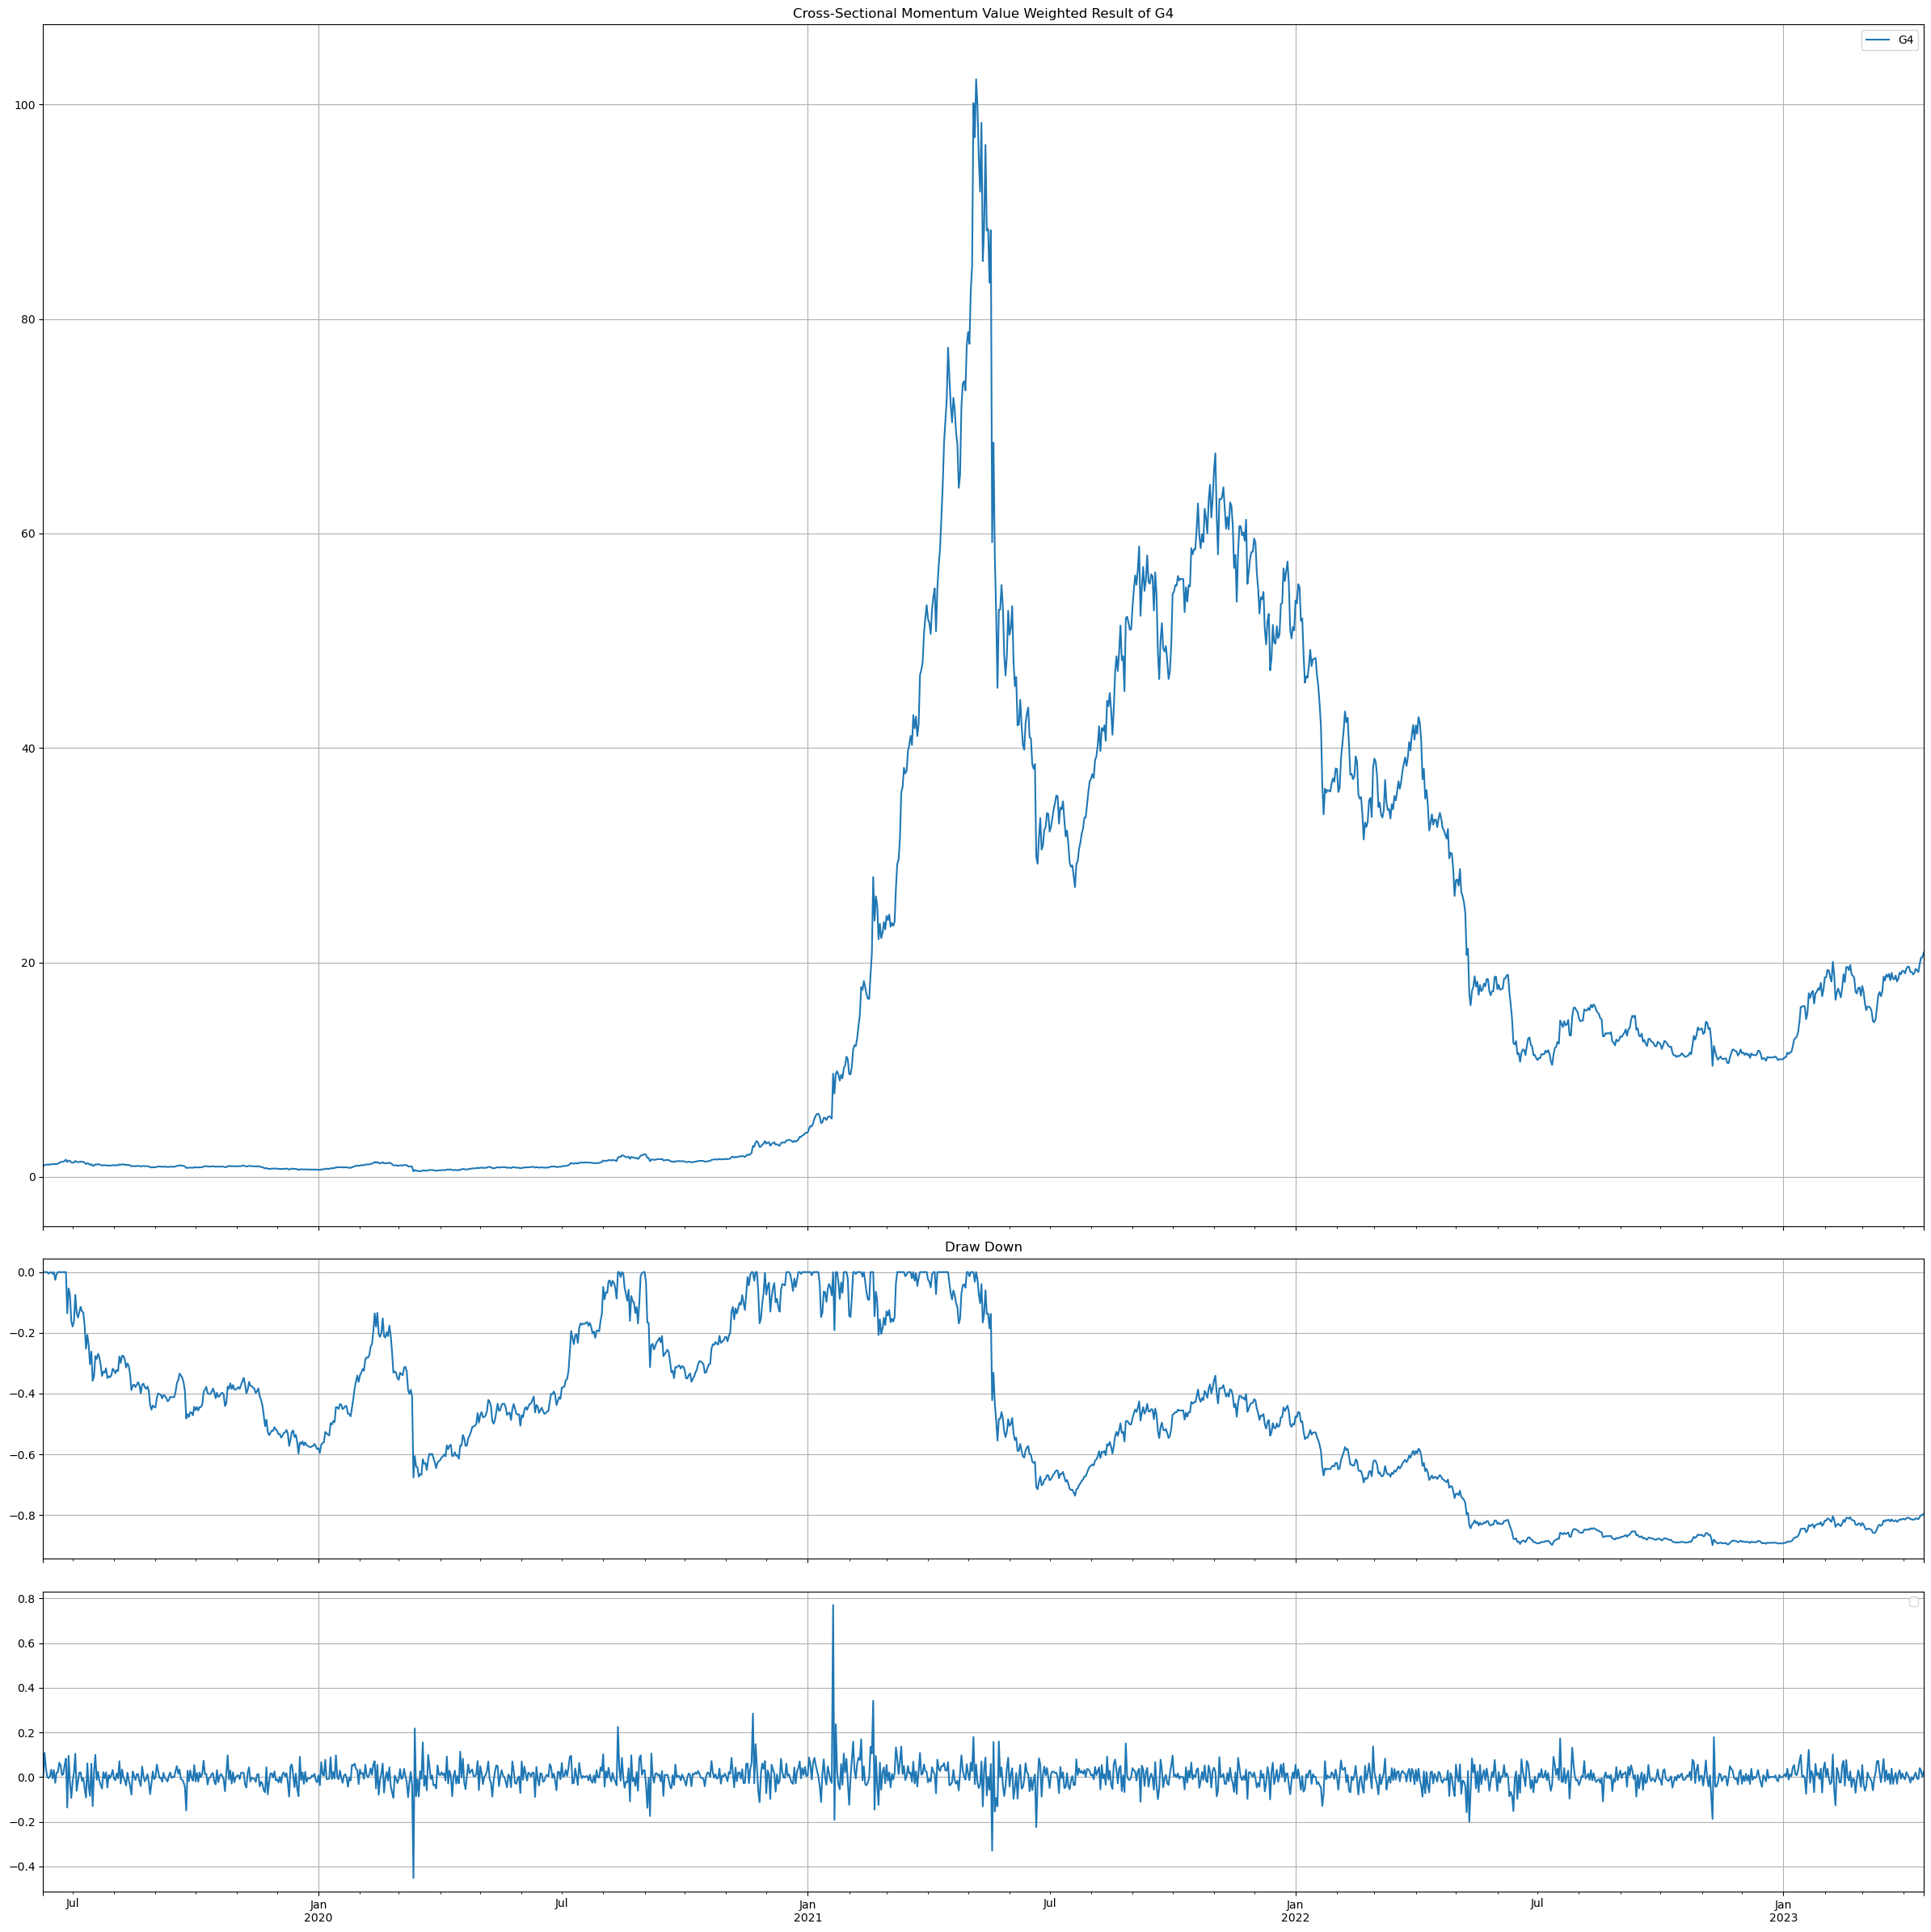

In [21]:
mytool.draw_return_result(momentum_cmktcap_reduced["M3"])

In [22]:
mytool.print_statistics(momentum_cmktcap_reduced["M3"])

0         1         2         3
CAGR   -0.320900  0.405600  0.246300  1.143100
Mean    0.128010  0.738680  0.588510  1.318000
STD     0.980802  0.871452  0.831850  1.039824
MDD     0.914000  0.805000  0.782000  0.899000
Sharpe  0.130516  0.847643  0.707471  1.267522

In [23]:
# 바이낸스
momentum_binance = {}
momentum_num_binance = {}

for key, value_lst in group_value.items():
    rtn, num = b_mkt.weekly_momentum_w(4,"SUN", 15, value_lst[0],value_lst[1])
    momentum_binance[key] = rtn
    momentum_num_binance[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

100%|██████████| 4/4 [00:01<00:00,  2.10it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


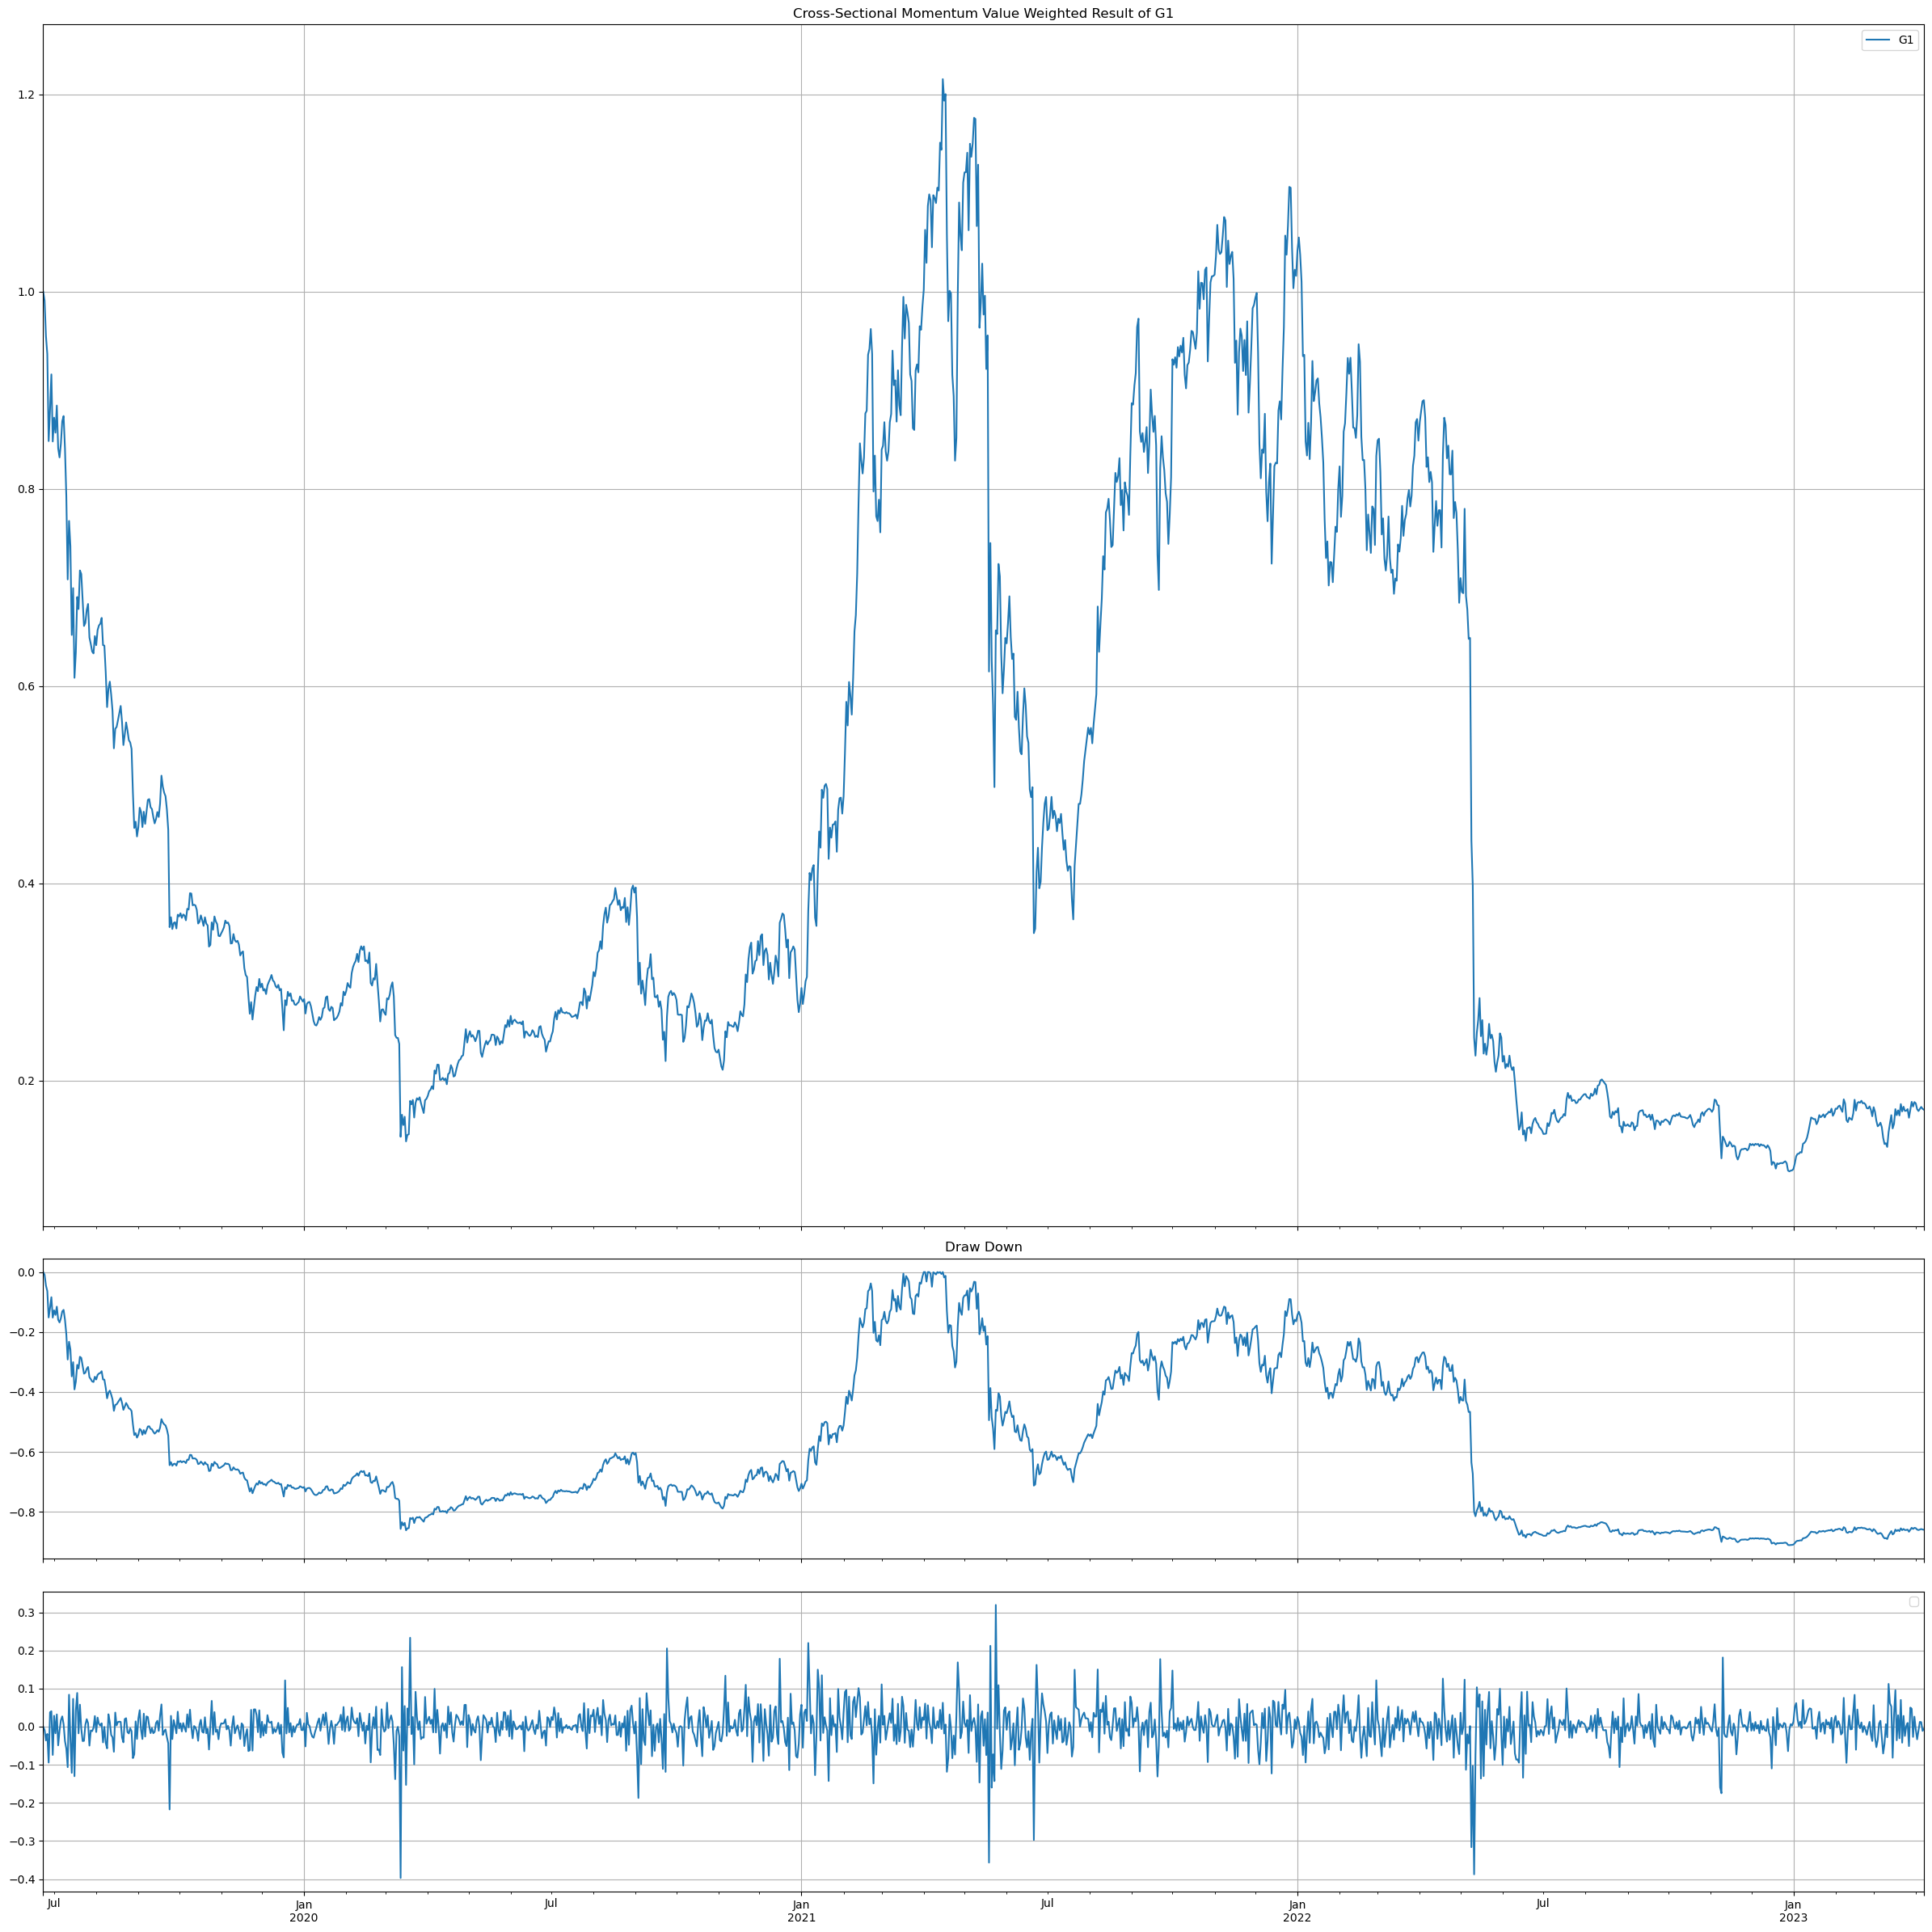

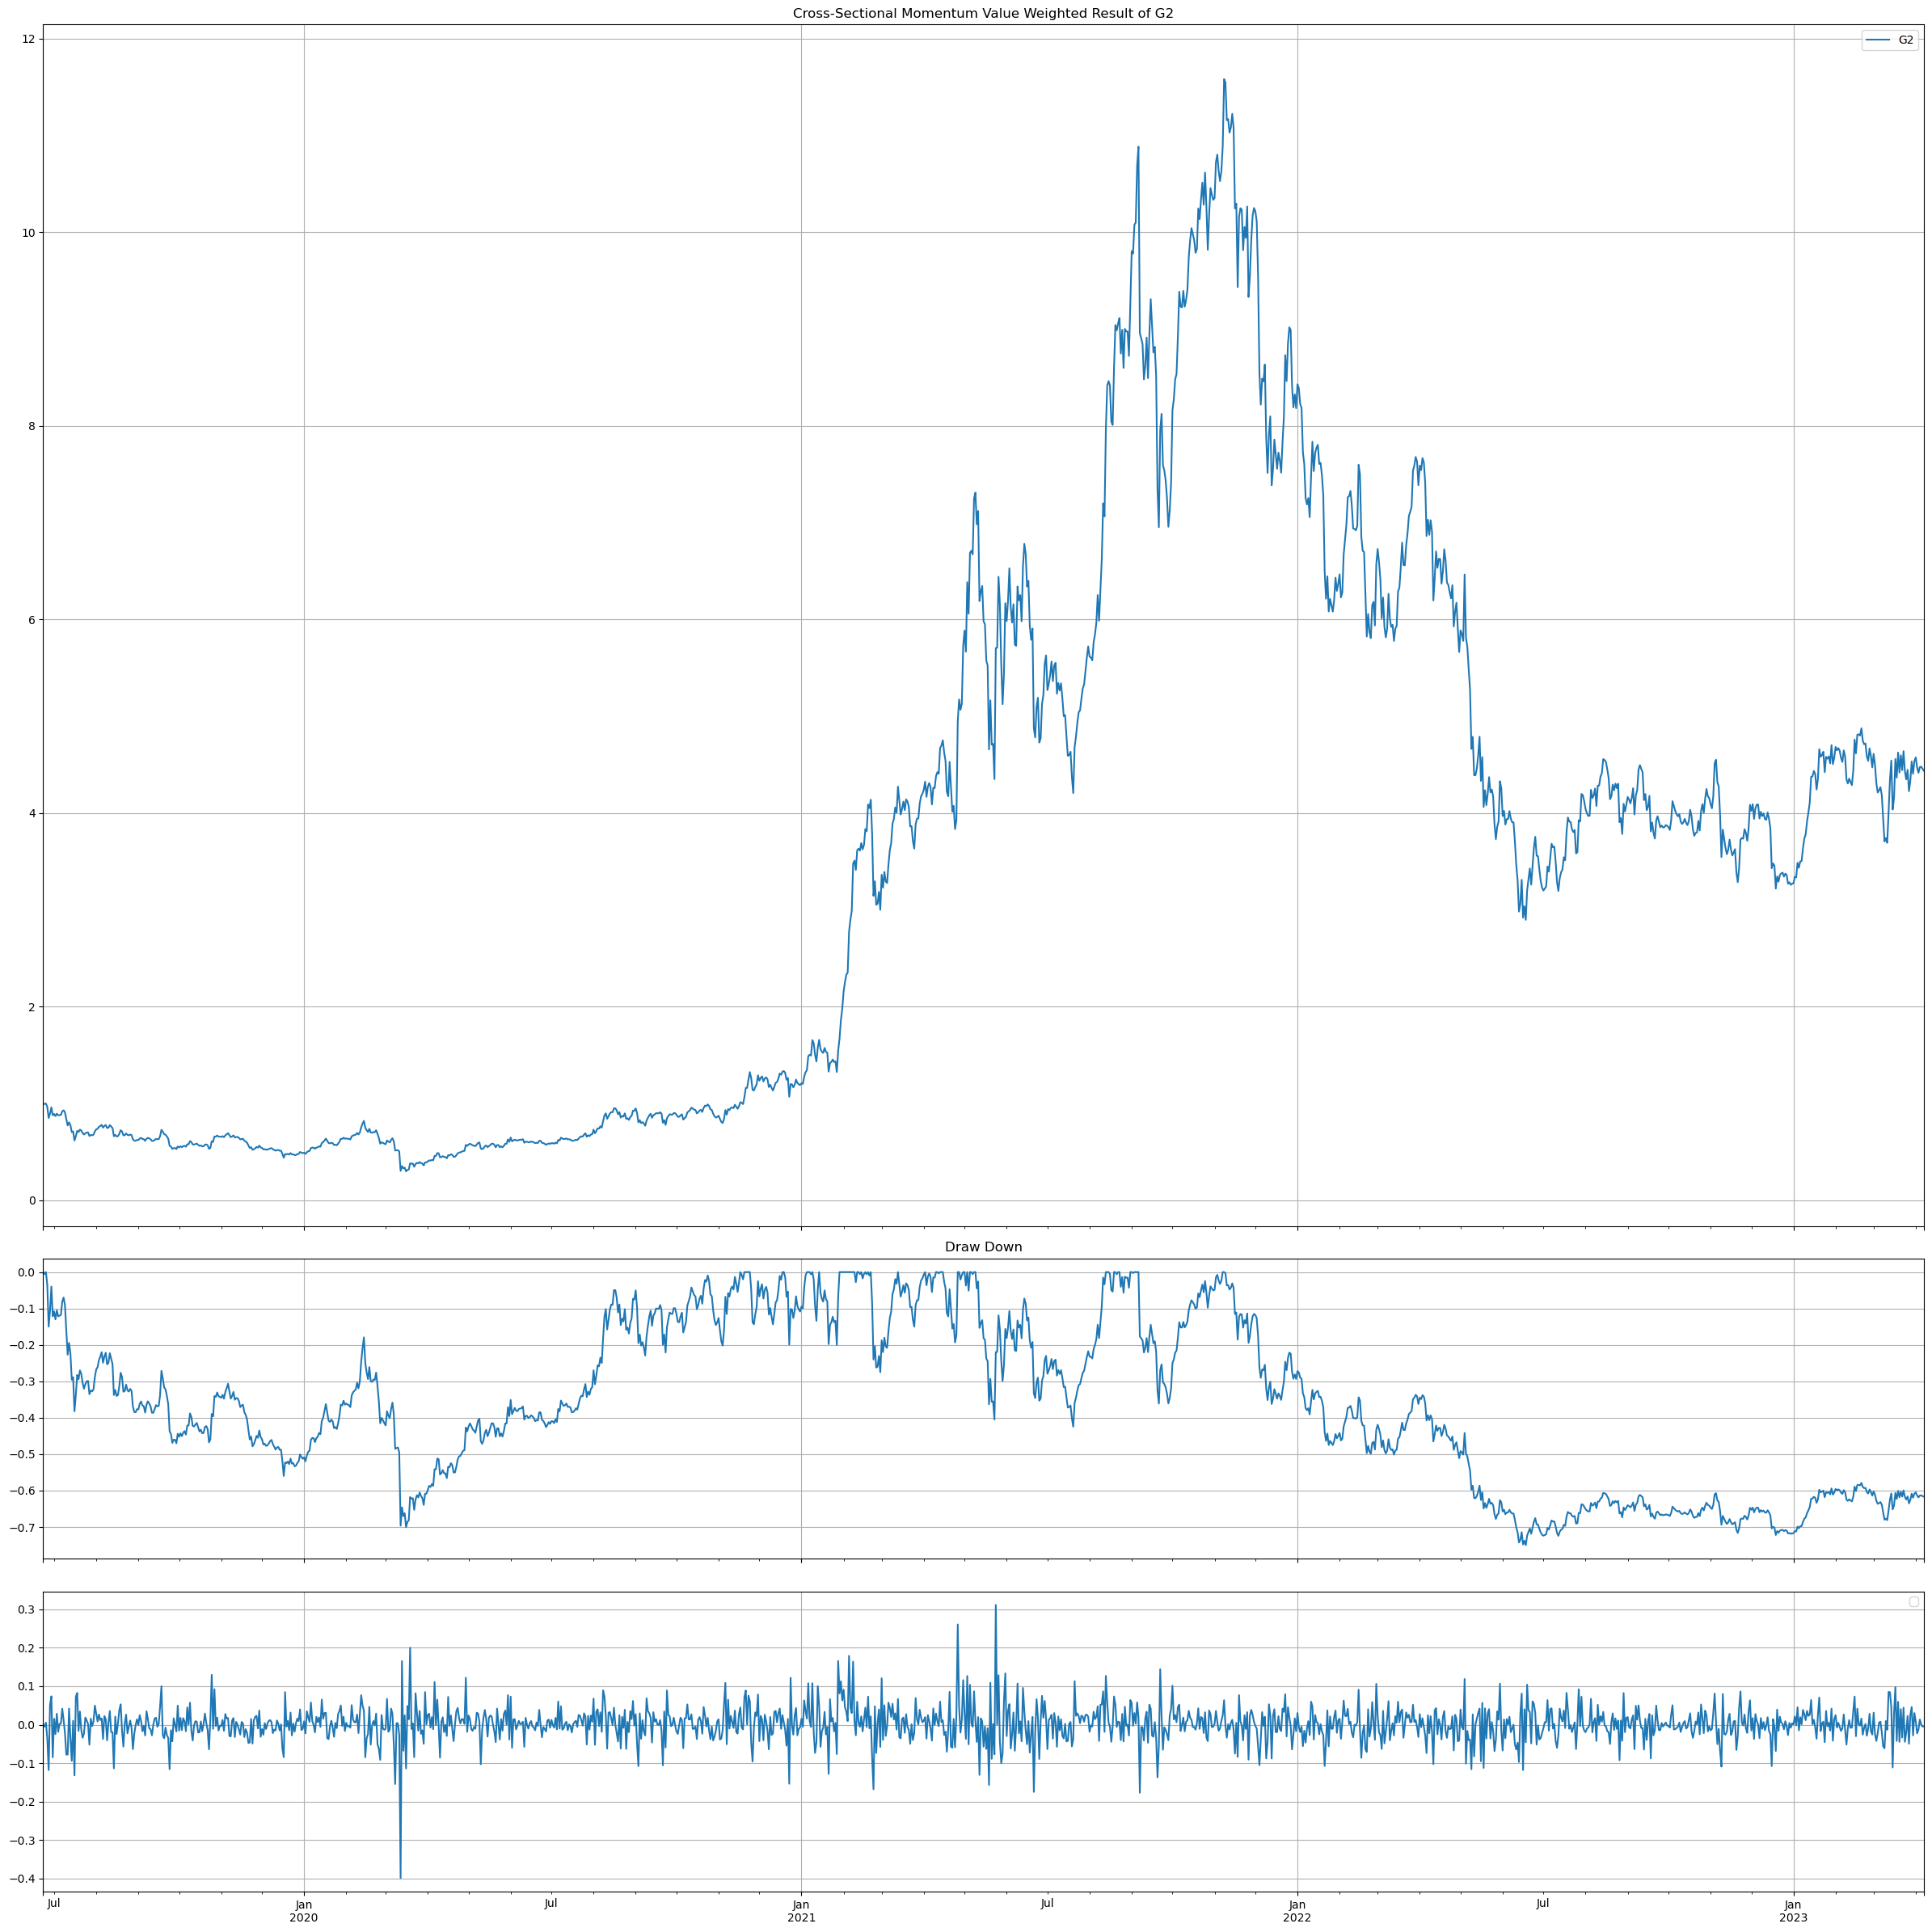

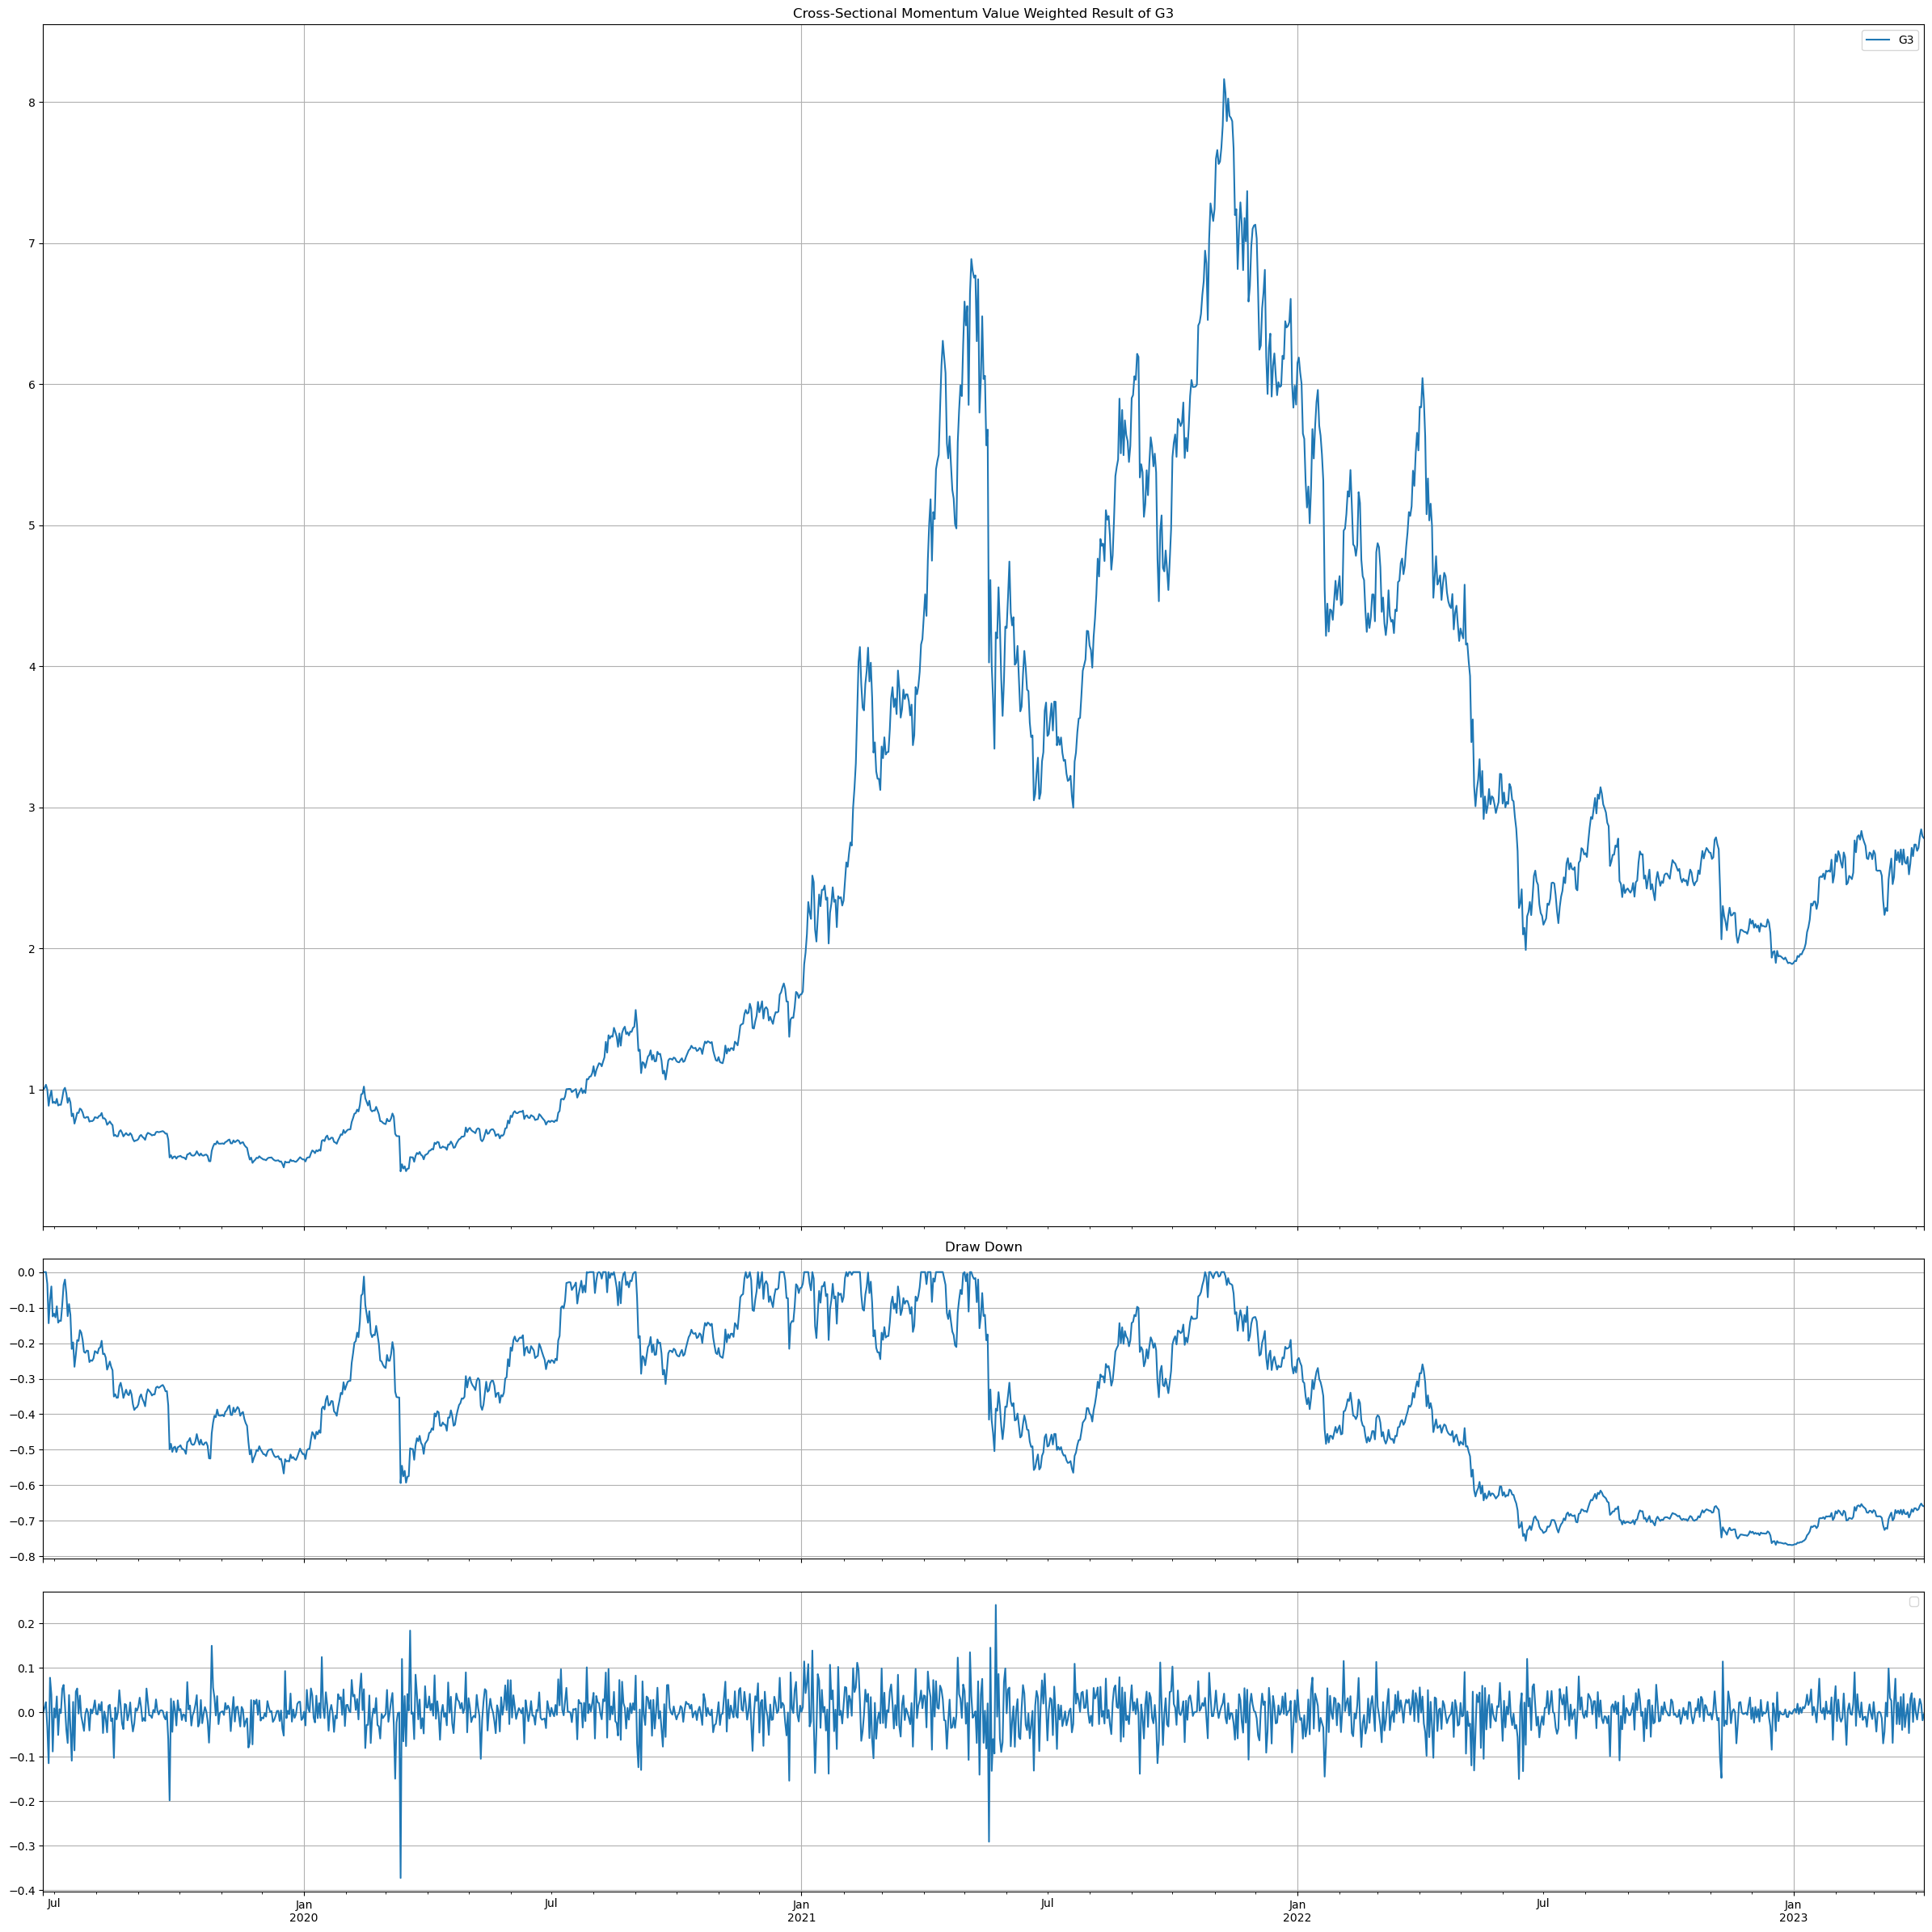

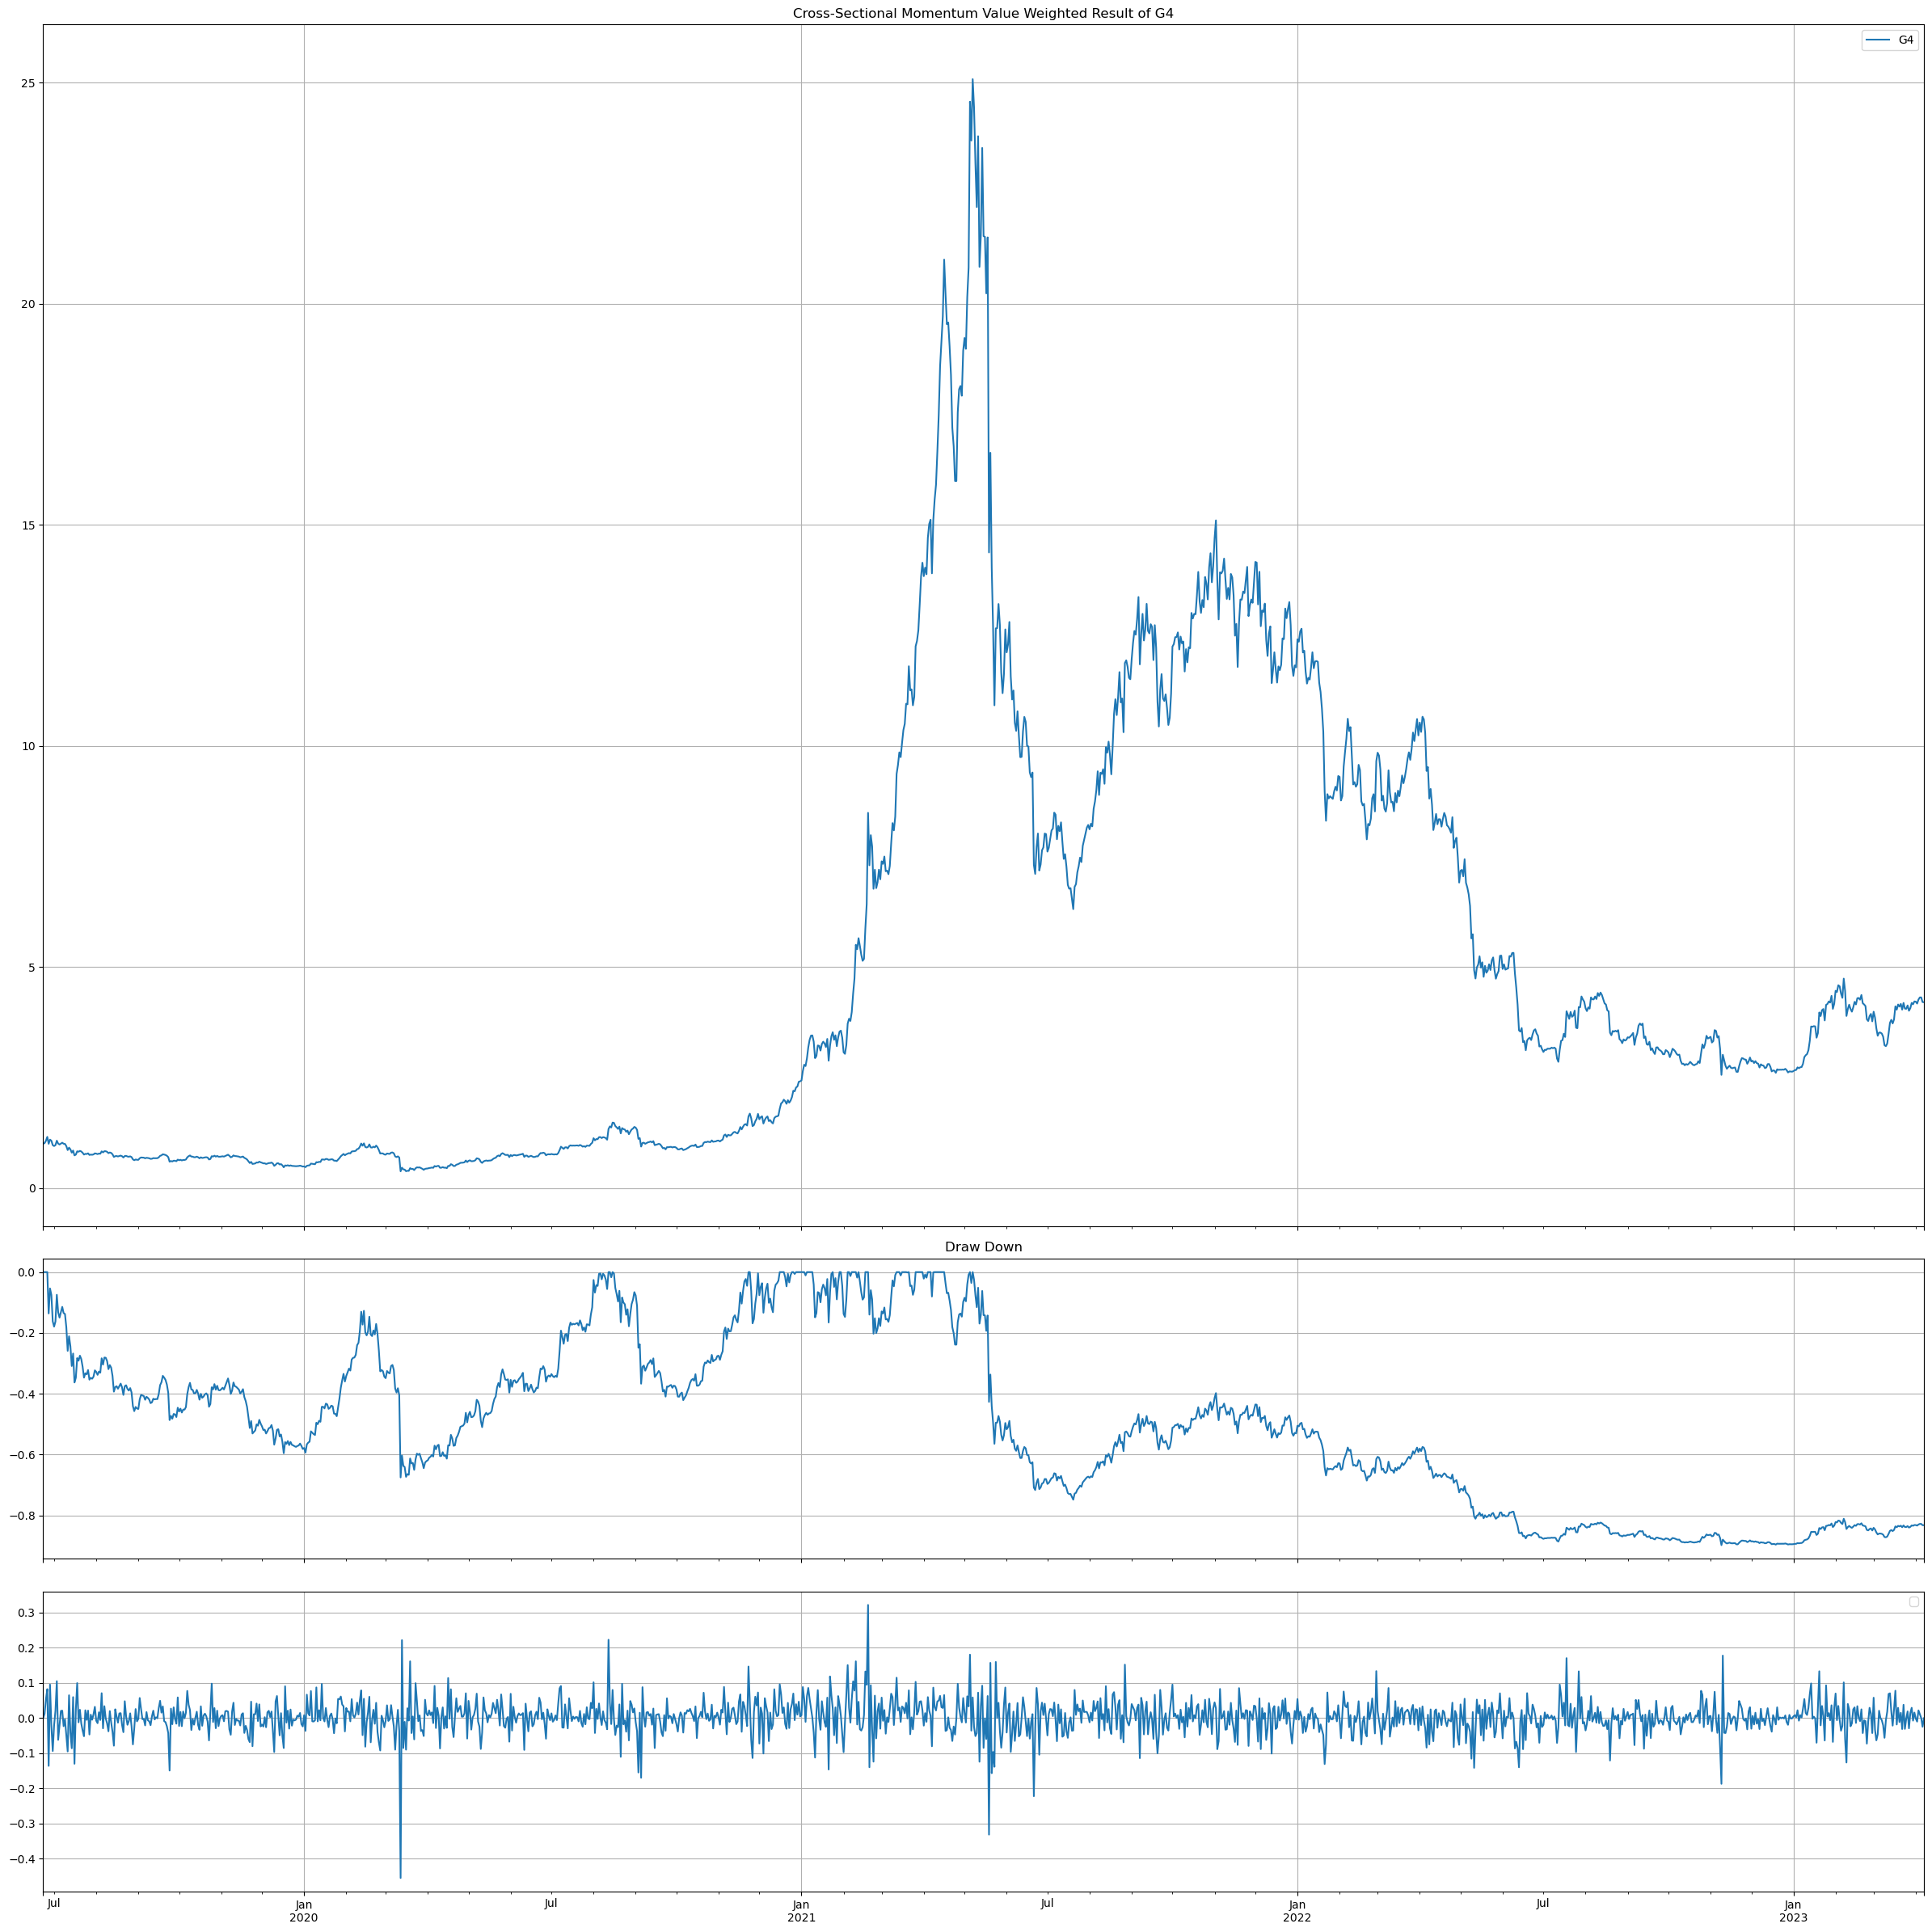

In [24]:
mytool.draw_return_result(momentum_binance["M3"])

In [25]:
mytool.print_statistics(momentum_binance["M3"])

0         1         2         3
CAGR   -0.371300  0.483500  0.306100  0.455300
Mean    0.048000  0.770770  0.634350  0.829050
STD     0.989233  0.862770  0.840975  0.932760
MDD     0.911000  0.750000  0.769000  0.898000
Sharpe  0.048522  0.893367  0.754303  0.888814